## Plot MBAR Free-Energy standard error of means for quintuplicates

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from rdkit.Chem import PandasTools

from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS, AllChem
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters
from rdkit.Chem import rdRGroupDecomposition
rg_params = RGroupDecompositionParameters()
rg_params.onlyMatchAtRGroups = True
from rdkit.Chem.Draw import DrawingOptions
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from PIL import Image

RDKit WARNING: [14:32:33] Enabling RDKit 2019.09.2 jupyter extensions


In [3]:
transf_0_ha = pd.read_csv("quintup_transform_0/freenrgs.csv", index_col=0)
transf_1_ha = pd.read_csv("quintup_transform_1/freenrgs.csv", index_col=0).dropna()
transf_2_ha = pd.read_csv("quintup_transform_2/freenrgs.csv", index_col=0).dropna()
transf_3_ha = pd.read_csv("round2/quintup_transform_3/freenrgs.csv", index_col=0).dropna()
transf_4_ha = pd.read_csv("round2/quintup_transform_4/freenrgs.csv", index_col=0).dropna()
transf_5_ha = pd.read_csv("round2/quintup_transform_5/freenrgs.csv", index_col=0).dropna()
transf_6_ha = pd.read_csv("round2/quintup_transform_6/freenrgs.csv", index_col=0).dropna()
transf_7_ha = pd.read_csv("round2/quintup_transform_7/freenrgs.csv", index_col=0).dropna()
transf_8_ha = pd.read_csv("round2/quintup_transform_8/freenrgs.csv", index_col=0).dropna()
transf_9_ha = pd.read_csv("round2/quintup_transform_9/freenrgs.csv", index_col=0).dropna()

num_0_ha = len(transf_0_ha)
num_1_ha = len(transf_1_ha)
num_2_ha = len(transf_2_ha)
num_3_ha = len(transf_3_ha)
num_4_ha = len(transf_4_ha)
num_5_ha = len(transf_5_ha)
num_6_ha = len(transf_6_ha)
num_7_ha = len(transf_7_ha)
num_8_ha = len(transf_8_ha)
num_9_ha = len(transf_9_ha)


In [21]:
def add_mean(transf_df):
    """add column of mean values to quintuplicates df; try quadriplicates or triplicates for non-completed perts"""
    try:
        transf_df["mean"] = (transf_df["rep1"] + transf_df["rep2"] + transf_df["rep3"] + transf_df["rep4"] + transf_df["rep5"])/5
    except KeyError:
        try:
            transf_df["mean"] = (transf_df["rep1"] + transf_df["rep2"] + transf_df["rep3"] + transf_df["rep4"])/4
        except KeyError:
            try:
                transf_df["mean"] = (transf_df["rep1"] + transf_df["rep2"] + transf_df["rep3"])/3
            except KeyError:
                transf_df["mean"] = (transf_df["rep1"] + transf_df["rep2"])/2
            

In [23]:
for transf_df in [transf_0_ha, 
                    transf_1_ha, 
                    transf_2_ha, 
                    transf_3_ha, 
                    transf_4_ha, 
                    transf_5_ha, 
                    transf_6_ha, 
                    transf_7_ha, 
                    transf_8_ha, 
                    transf_9_ha]:
    add_mean(transf_df)

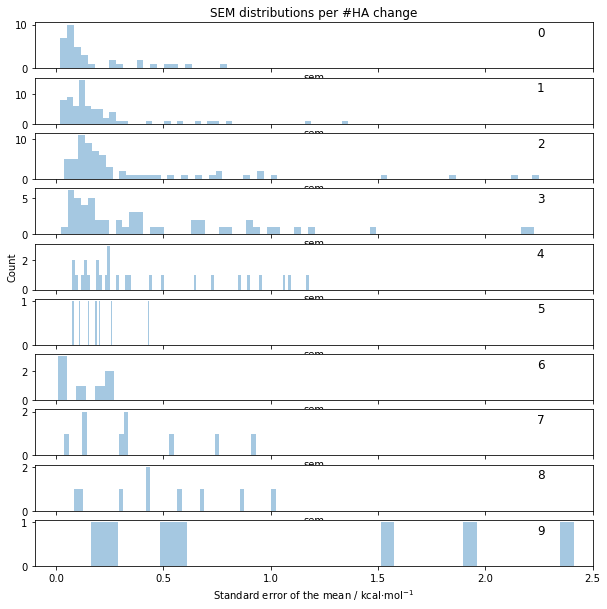

In [24]:
f, axes = plt.subplots(10, 1, sharex=True, sharey=False, figsize=(10,10))

sns.distplot(transf_0_ha['sem'], kde=False, ax=axes[0], bins=int(len(transf_0_ha['sem'])/1.5),
                 label = "0 HA, n= "+str(num_0_ha))
sns.distplot(transf_1_ha['sem'], kde=False, ax=axes[1], bins=int(len(transf_1_ha['sem'])/1.5),
                 label = "1 HA, n= "+str(num_1_ha))
sns.distplot(transf_2_ha['sem'], kde=False, ax=axes[2], bins=200,
                 label = "2 HA, n= "+str(num_2_ha))
sns.distplot(transf_3_ha['sem'], kde=False, ax=axes[3], bins=1000,
                 label = "3 HA, n= "+str(num_3_ha))
sns.distplot(transf_4_ha['sem'], kde=False, ax=axes[4], bins=80,
                 label = "4 HA, n= "+str(num_4_ha))
sns.distplot(transf_5_ha['sem'], kde=False, ax=axes[5], bins=50,
                 label = "5 HA***, n= "+str(num_5_ha))
sns.distplot(transf_6_ha['sem'], kde=False, ax=axes[6], bins=1000,
                 label = "6 HA**, n= "+str(num_6_ha))
sns.distplot(transf_7_ha['sem'], kde=False, ax=axes[7], bins=1000,
                 label = "7 HA**, n= "+str(num_7_ha))
sns.distplot(transf_8_ha['sem'], kde=False, ax=axes[8], bins=1000,
                 label = "8 HA**, n= "+str(num_8_ha))
sns.distplot(transf_9_ha['sem'], kde=False, ax=axes[9], bins=1000,
                 label = "9 HA**, n= "+str(num_9_ha))

for num in range(10):
    axes[num].annotate(num, xy=(0.9,0.7), xycoords='axes fraction', fontsize="large")
    
    
axes[4].set_ylabel("Count")
plt.xlabel("Standard error of the mean / kcal$\cdot$mol$^{-1}$")
plt.xlim(-0.1,2.5)
axes[0].set_title("SEM distributions per #HA change")
plt.show()

## Correlate SEM to OS and MBARe

In [25]:
transf_0_ha["ha"] = 0
transf_1_ha["ha"] = 1
transf_2_ha["ha"] = 2
transf_3_ha["ha"] = 3
transf_4_ha["ha"] = 4
transf_5_ha["ha"] = 5
all_transf_qu = pd.concat([transf_0_ha, transf_1_ha, transf_2_ha])

In [26]:
# for each perturbation, retrieve the OS and MBAR error:
for qu_pert in all_transf_qu.index.values:

    with open('/home/jscheen/projects/HYDRA_LEARN/labels/mbar_labels.txt') as f:
        line = next((l for l in f if qu_pert in l), None)
        if line != None:
            mbar_err = line.rsplit(",")[1].strip('\n')
            overlapscore = line.rsplit(",")[3].strip('\n')
    try:        
        all_transf_qu.loc[qu_pert, "OS"] = float(overlapscore)
        all_transf_qu.loc[qu_pert, "MBARe"] = float(mbar_err)
    except ValueError:
        pass

In [27]:
all_transf_qu.dropna()

,rep1,rep2,rep3,rep4,rep5,sem,mean,ha,OS,MBARe
mobley_9478823~mobley_4715906,-51.836083,-51.732806,-51.928771,-51.988584,-51.758251,0.048862,-51.848899,0,0.14935,0.173035
mobley_8467917~mobley_8614858,-26.068453,-25.641639,-26.089881,-25.753705,-25.783810,0.089667,-25.867498,0,0.15840,0.120757
mobley_4043951~mobley_9246215,22.923069,21.656990,23.162902,24.663590,21.743756,0.549428,22.830061,0,0.16038,0.087357
mobley_2008055~mobley_6091882,19.668912,22.465190,22.392292,23.243188,21.494656,0.612245,21.852848,0,0.16219,0.068575
mobley_8765203~mobley_1803862,-43.163017,-42.849178,-42.834215,-43.141906,-43.034445,0.070010,-43.004552,0,0.15183,0.141769
...,...,...,...,...,...,...,...,...,...,...
mobley_1827204~mobley_8573194,-0.355237,-1.058896,-1.065017,-0.791982,-0.777934,0.129450,-0.809813,2,0.13059,0.087946
mobley_8739734~mobley_4893032,-13.407331,-12.998241,-13.062320,-13.287444,-13.522313,0.099690,-13.255530,2,0.11351,0.346856
mobley_2929847~mobley_8573194,38.644018,38.481616,38.546725,38.621115,38.338654,0.054987,38.526426,2,0.15456,0.265924
mobley_2609604~mobley_1139153,-0.806875,-1.371376,-1.531612,-1.197433,-2.755449,0.328661,-1.532549,2,0.11089,0.302956


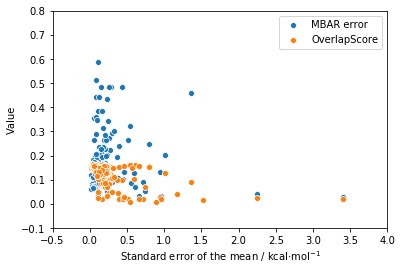

In [28]:
sns.scatterplot(x=all_transf_qu["sem"], y=all_transf_qu["MBARe"], label="MBAR error")
sns.scatterplot(x=all_transf_qu["sem"], y=all_transf_qu["OS"], label="OverlapScore")

plt.ylabel("Value")
plt.xlabel("Standard error of the mean / kcal$\cdot$mol$^{-1}$")
plt.xlim(-0.5, 4)
plt.ylim(-0.1, 0.8)
plt.show()

## Generate table with all Perts + SEMs

In [29]:
all_transf_qu = pd.concat([
    transf_0_ha, 
    transf_1_ha, 
    transf_2_ha,
    transf_3_ha, 
    transf_4_ha, 
    transf_5_ha,
    transf_6_ha, 
    transf_7_ha, 
    transf_8_ha,
    transf_9_ha
], sort=False)

In [30]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

### Find Quintuplicates that were run in both directions, compare SEM:

In [31]:
def plot_gradients(pert_name):
    """
    Plot mean gradients across quintuplicate for given perturbation in both directions. 
    Reads in ./gradients_reversible/rep_*/*
    """
    ligA = pert_name.split("~")[0]
    ligB = pert_name.split("~")[1]
    pert_name1 = pert_name
    pert_name2 = ligB+"~"+ligA
    
    
    def read_gradients(pert):
        rep_dict = {"0.00000" : [], "0.10000" : [], "0.20000" : [], "0.30000" : [], "0.40000" : [], "0.50000" : [], "0.60000" : [], "0.70000" : [], "0.80000" : [], "0.90000" : [], "1.00000" : []}
        for rep in [1,2,3,4,5]:

            filepath = "gradients_reversible/rep_"+str(rep)+"/"+pert+"/free/"

            gradient_files = [ path+"/gradients.dat" for path in glob.glob(filepath+"*/") ]

            for gradient_file in gradient_files:
                gradients_df = pd.read_csv(gradient_file, sep="\t")
                lambda_val = gradients_df.columns.values[0].split(" ")[2]
                gradient_vals = []
                for val in gradients_df.values:
                    gradient_vals.append(float(val[0].split(" ")[-1]))
                mean_gradient = np.mean(gradient_vals)
                rep_dict[str(lambda_val)].append(mean_gradient)

        for key, values in rep_dict.items():
            rep_dict[key] = [np.mean(values), np.std(values)]
        gradients_processed_df = pd.DataFrame.from_dict(rep_dict, orient="index", columns=["mean", "std"])
        return gradients_processed_df
    fwd_gradients = read_gradients(pert_name1)
    bck_gradients = read_gradients(pert_name2)

    bck_gradients_reversed = bck_gradients.iloc[::-1]

    # now plot:
    fig, axes = plt.subplots(1, 1, figsize=(7, 2))

    axes.errorbar(fwd_gradients.index, fwd_gradients["mean"], yerr=fwd_gradients["std"], marker="o", label="Forward")
    axes.errorbar(fwd_gradients.index, bck_gradients_reversed["mean"]*-1, yerr=bck_gradients_reversed["std"], marker="o", label="Back")
    
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
    axes.set_xlabel("Lambda")
    axes.set_ylabel("Gradient")
    return axes

####################
mobley_4715906~mobley_9478823
SEM: 0.8 kcal/mol, backwards: 0.049


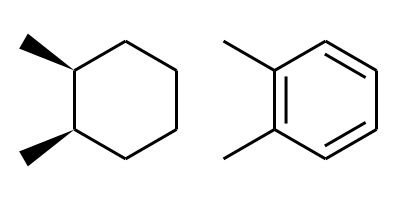

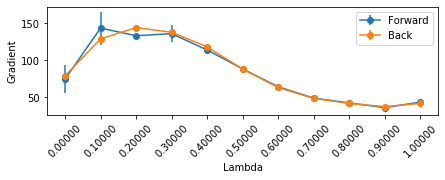

####################
mobley_1827204~mobley_3546460
SEM: 0.11 kcal/mol, backwards: 0.033


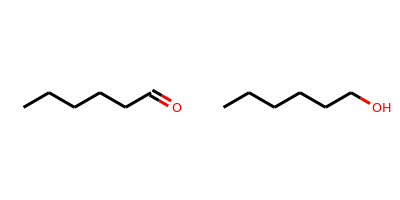

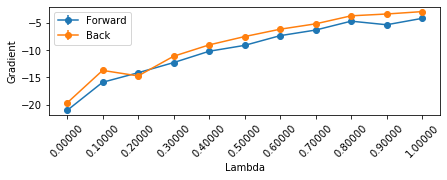

####################
mobley_8492526~mobley_5759258
SEM: 0.05 kcal/mol, backwards: 0.096


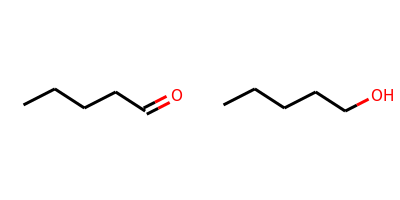

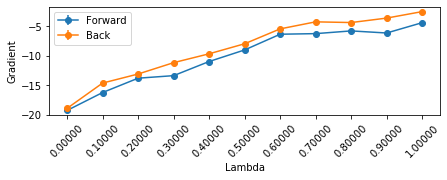

####################
mobley_6091882~mobley_2008055
SEM: 0.05 kcal/mol, backwards: 0.612


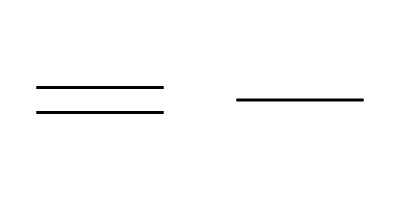

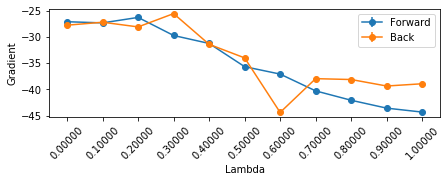

####################
mobley_646007~mobley_2837389
SEM: 0.46 kcal/mol, backwards: 0.037


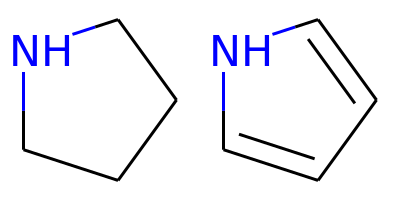

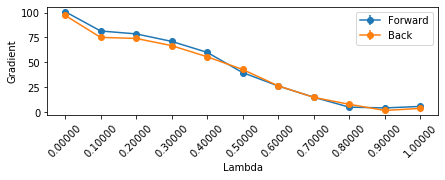

####################
mobley_8614858~mobley_49274
SEM: 0.27 kcal/mol, backwards: 0.146


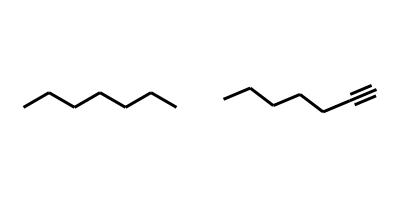

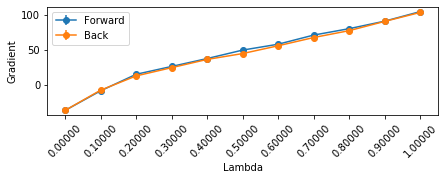

####################
mobley_4043951~mobley_5449201
SEM: 0.02 kcal/mol, backwards: 0.171


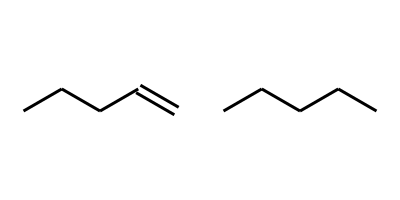

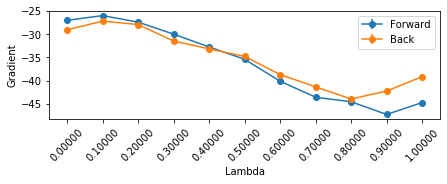

In [11]:
reversed_bucket = []
handled_bucket = []


for index, row in all_transf_qu.iterrows():
    #print(index, row["sem"])
    ligA = index.split("~")[0]
    ligB = index.split("~")[1]
    reverse_pert = ligB+"~"+ligA
    
    ligA_mol = Chem.rdmolfiles.MolFromMolFile("/home/jscheen/projects/HYDRA_LEARN/FREESOLV/"+ligA+".pdb.sdf")
    ligB_mol = Chem.rdmolfiles.MolFromMolFile("/home/jscheen/projects/HYDRA_LEARN/FREESOLV/"+ligB+".pdb.sdf")
    
    if index in reversed_bucket and index not in handled_bucket:


        #a few mols are a bit buggy, ignore for now.

        Chem.rdDepictor.Compute2DCoords(ligA_mol)
        Chem.rdDepictor.Compute2DCoords(ligB_mol)

        ligA_mol.UpdatePropertyCache()
        ligB_mol.UpdatePropertyCache()



        edge_length = 200
        molA_img = Draw.MolToImage(ligA_mol, size=(edge_length, edge_length), kekulize=True, wedgeBonds=True)
        molB_img = Draw.MolToImage(ligB_mol, size=(edge_length, edge_length), kekulize=True, wedgeBonds=True)

        print("####################")
        print(index)
        SEM_back = round(all_transf_qu.loc[reverse_pert]["sem"], 3)
        print("SEM:", round(row["sem"], 2), "kcal/mol, backwards:", SEM_back)
        display(get_concat_h(molA_img, molB_img))
        #except:
        handled_bucket.append(reverse_pert)
        
        # plot gradients:
        plot_gradients(index)
        plt.legend()
        plt.show()
        


    reversed_bucket.append(reverse_pert)
            

### Print all quintuplicates with their SEMs:

####################
mobley_9478823~mobley_4715906
SEM: 0.05 kcal/mol


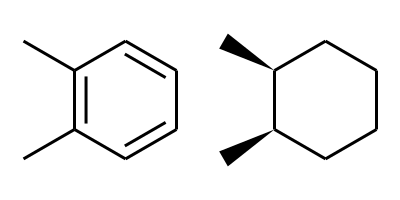

####################
mobley_8467917~mobley_8614858
SEM: 0.09 kcal/mol


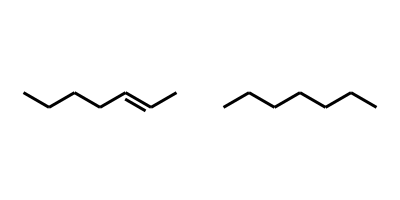

####################
mobley_4043951~mobley_9246215
SEM: 0.55 kcal/mol


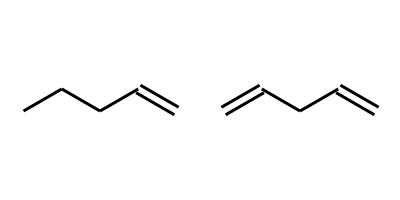

####################
mobley_2008055~mobley_6091882
SEM: 0.61 kcal/mol


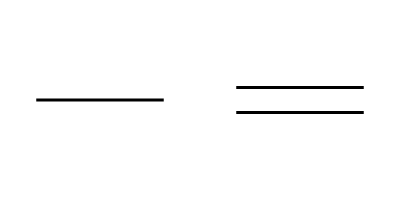

####################
mobley_8765203~mobley_1803862
SEM: 0.07 kcal/mol


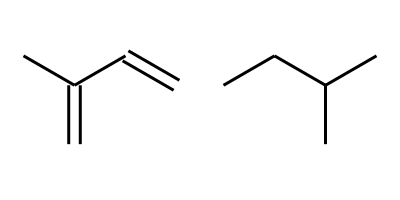

####################
mobley_7859387~mobley_5079234
SEM: 0.08 kcal/mol


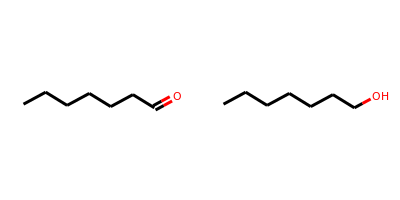

####################
mobley_4715906~mobley_9478823
SEM: 0.8 kcal/mol


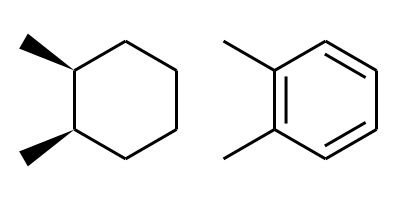

####################
mobley_3546460~mobley_1827204
SEM: 0.03 kcal/mol


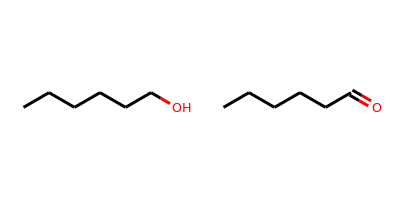

####################
mobley_1827204~mobley_3546460
SEM: 0.11 kcal/mol


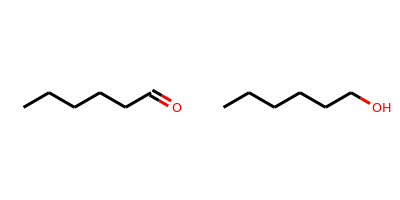

####################
mobley_2859600~mobley_8127829
SEM: 0.08 kcal/mol


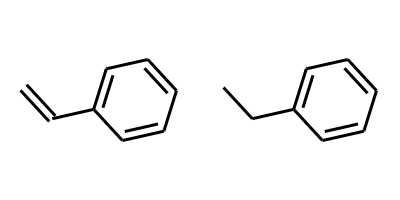

####################
mobley_4883284~mobley_1036761
SEM: 0.06 kcal/mol


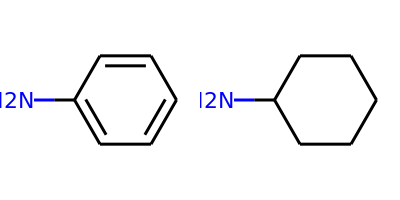

####################
mobley_9185328~mobley_4305650
SEM: 0.06 kcal/mol


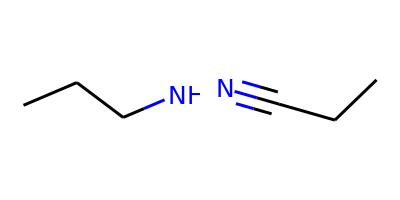

####################
mobley_49274~mobley_8614858
SEM: 0.15 kcal/mol


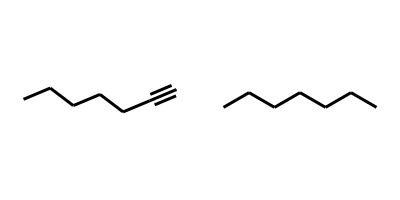

####################
mobley_5759258~mobley_8492526
SEM: 0.1 kcal/mol


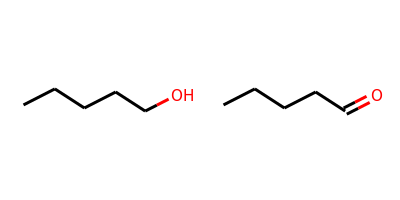

####################
mobley_4561957~mobley_900088
SEM: 0.1 kcal/mol


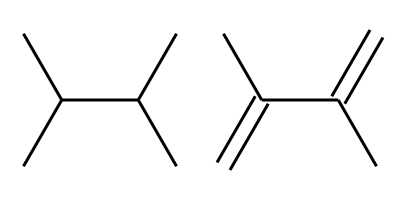

####################
mobley_6812653~mobley_5310099
SEM: 0.25 kcal/mol


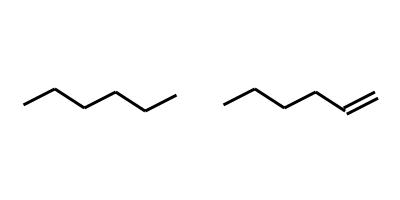

####################
mobley_6632459~mobley_8118832
SEM: 0.39 kcal/mol


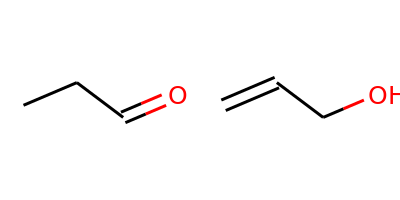

####################
mobley_8337722~mobley_5616693
SEM: 0.38 kcal/mol


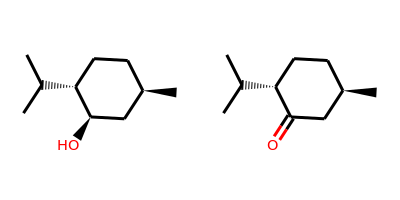

####################
mobley_1967551~mobley_2310185
SEM: 0.1 kcal/mol


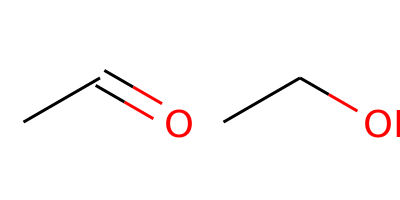

####################
mobley_8492526~mobley_5759258
SEM: 0.05 kcal/mol


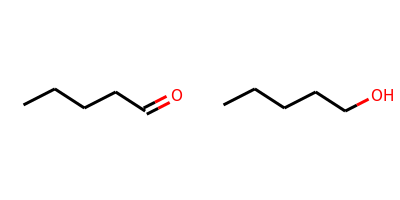

####################
mobley_8118832~mobley_313406
SEM: 0.04 kcal/mol


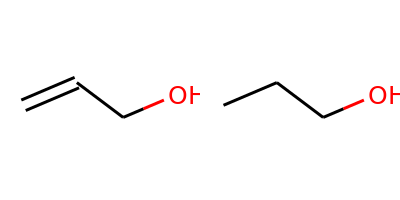

####################
mobley_7142697~mobley_4893032
SEM: 0.08 kcal/mol


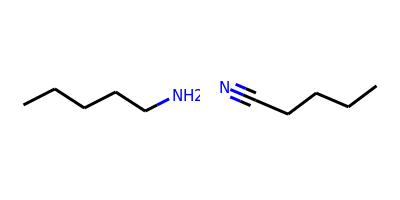

####################
mobley_299266~mobley_5157661
SEM: 0.07 kcal/mol


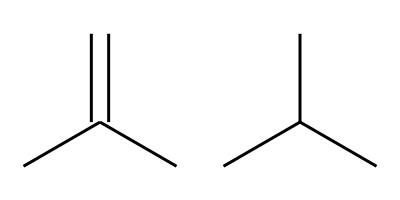

####################
mobley_6091882~mobley_2008055
SEM: 0.05 kcal/mol


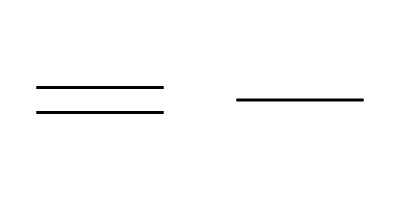

####################
mobley_2837389~mobley_646007
SEM: 0.04 kcal/mol


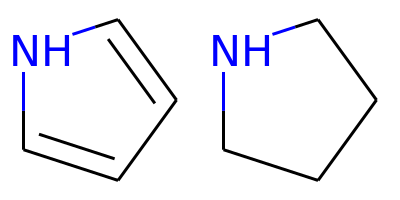

####################
mobley_2864987~mobley_1881249
SEM: 0.05 kcal/mol


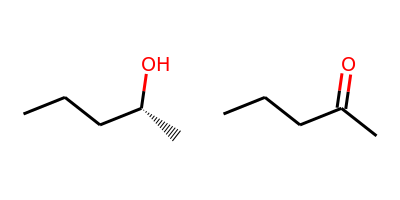

####################
mobley_7497999~mobley_2043882
SEM: 0.28 kcal/mol


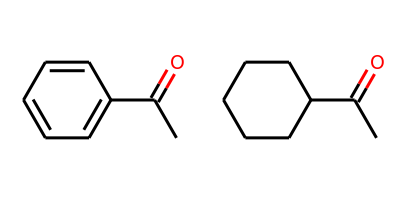

####################
mobley_646007~mobley_2837389
SEM: 0.46 kcal/mol


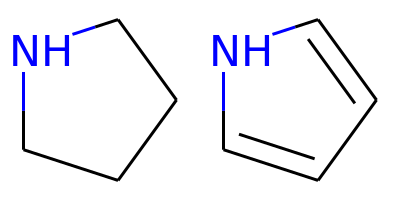

####################
mobley_5449201~mobley_4043951
SEM: 0.17 kcal/mol


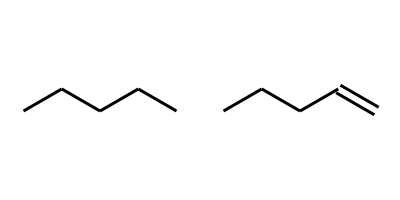

####################
mobley_7326982~mobley_3867265
SEM: 0.06 kcal/mol


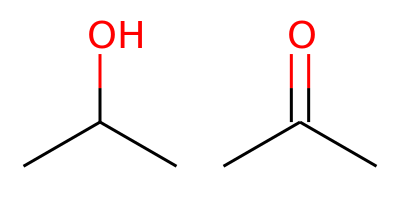

####################
mobley_5449201~mobley_9246215
SEM: 0.54 kcal/mol


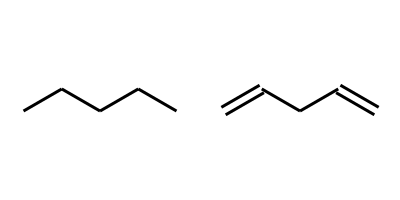

####################
mobley_9733743~mobley_8221999
SEM: 0.12 kcal/mol


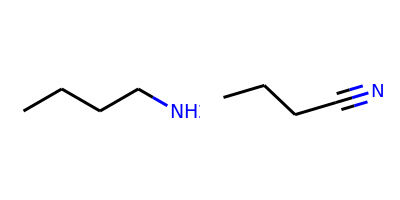

####################
mobley_8614858~mobley_49274
SEM: 0.27 kcal/mol


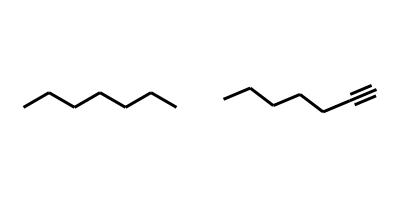

####################
mobley_8885088~mobley_8006582
SEM: 0.07 kcal/mol


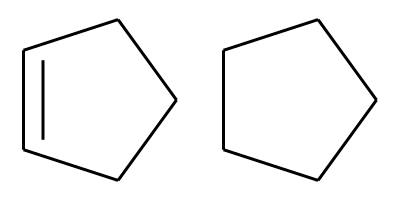

####################
mobley_4043951~mobley_5449201
SEM: 0.02 kcal/mol


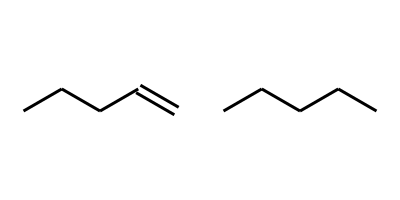

####################
mobley_778352~mobley_2143011
SEM: 0.13 kcal/mol


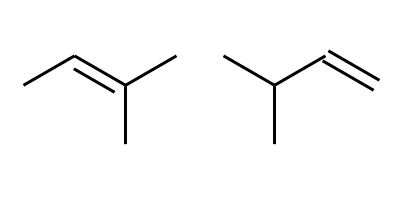

####################
mobley_9838013~mobley_7227357
SEM: 0.12 kcal/mol


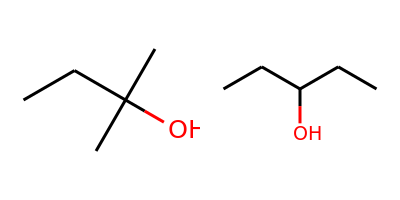

####################
mobley_5026370~mobley_8798016
SEM: 0.07 kcal/mol


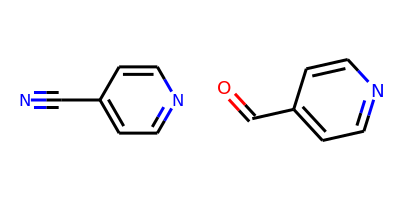

####################
mobley_5518547~mobley_8691603
SEM: 0.12 kcal/mol


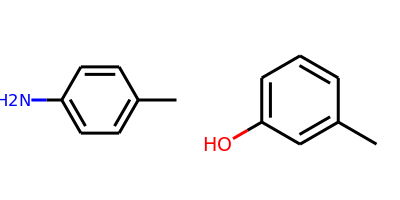

####################
mobley_7142697~mobley_9246215
SEM: 0.79 kcal/mol


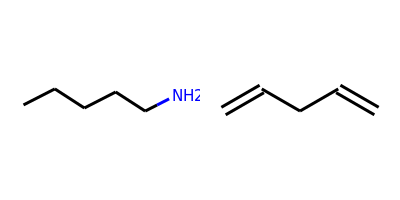

####################
mobley_8772587~mobley_9246215
SEM: 1.36 kcal/mol


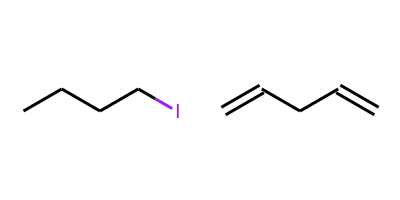

####################
mobley_9121449~mobley_9112978
SEM: 0.11 kcal/mol


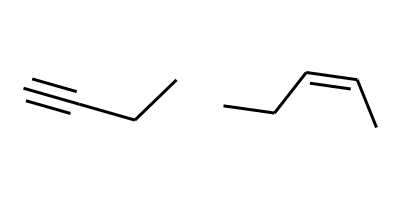

####################
mobley_1873346~mobley_1905088
SEM: 0.24 kcal/mol


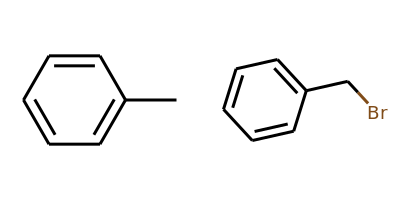

####################
mobley_7859387~mobley_4762983
SEM: 0.21 kcal/mol


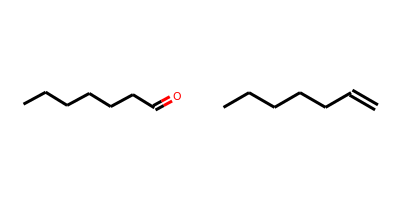

####################
mobley_9246215~mobley_8573194
SEM: 0.05 kcal/mol


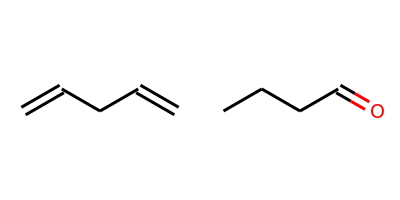

####################
mobley_1662128~mobley_303222
SEM: 0.25 kcal/mol


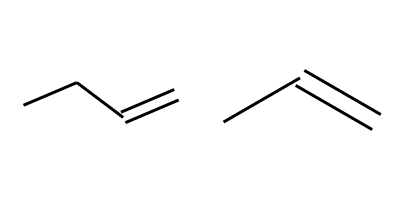

####################
mobley_4893032~mobley_1881249
SEM: 0.13 kcal/mol


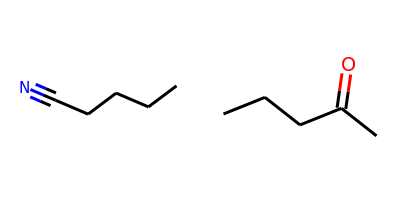

####################
mobley_8668219~mobley_3414356
SEM: 0.08 kcal/mol


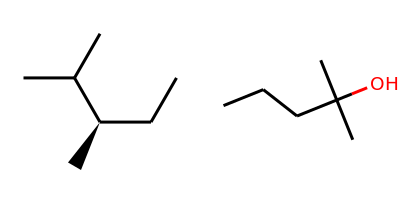

####################
mobley_5759258~mobley_2864987
SEM: 0.06 kcal/mol


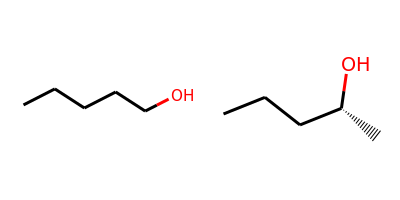

####################
mobley_1899443~mobley_8436428
SEM: 0.12 kcal/mol


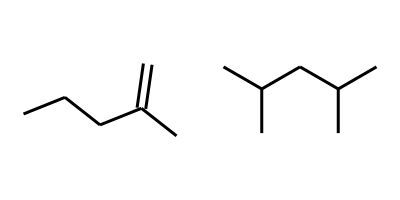

####################
mobley_1803862~mobley_900088
SEM: 0.67 kcal/mol


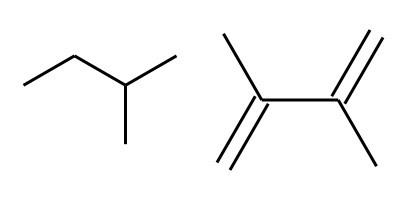

####################
mobley_1728386~mobley_2661134
SEM: 0.12 kcal/mol


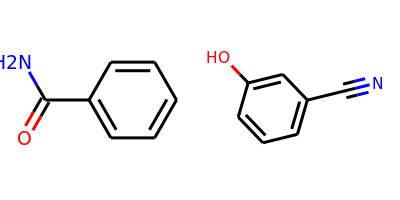

####################
mobley_1903702~mobley_6632459
SEM: 0.18 kcal/mol


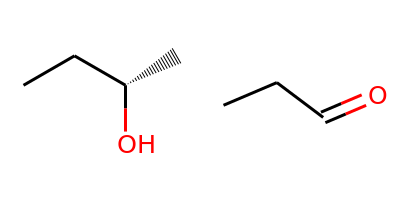

####################
mobley_5759258~mobley_9246215
SEM: 0.57 kcal/mol


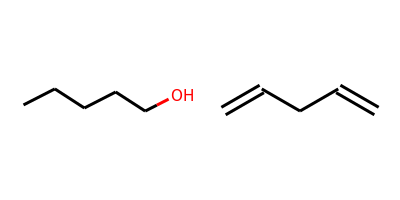

####################
mobley_4924862~mobley_5471704
SEM: 0.11 kcal/mol


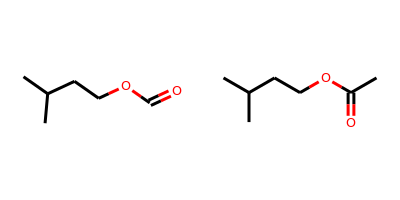

####################
mobley_1923244~mobley_8118832
SEM: 0.05 kcal/mol


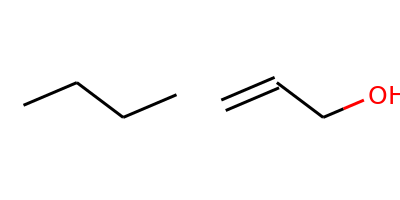

####################
mobley_6632459~mobley_210639
SEM: 0.25 kcal/mol


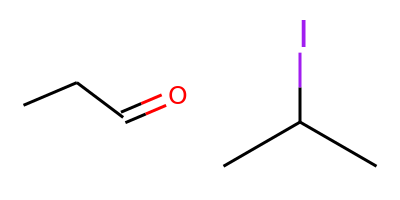

####################
mobley_2925352~mobley_2923700
SEM: 0.08 kcal/mol


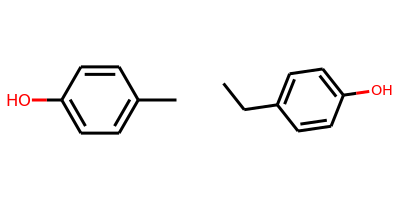

####################
mobley_2487143~mobley_5759258
SEM: 0.04 kcal/mol


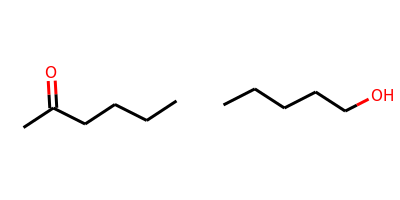

####################
mobley_8789465~mobley_852937
SEM: 0.2 kcal/mol


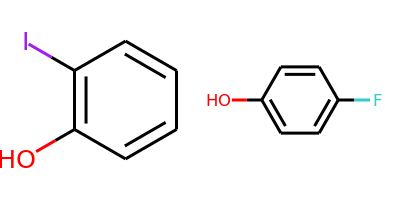

####################
mobley_5690766~mobley_2864987
SEM: 0.76 kcal/mol


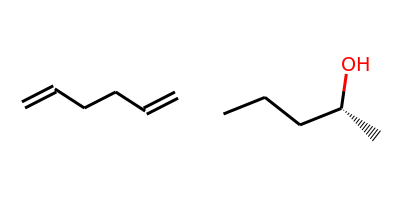

####################
mobley_9112978~mobley_1563176
SEM: 0.1 kcal/mol


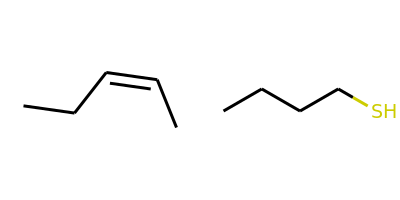

####################
mobley_1899443~mobley_4043987
SEM: 0.2 kcal/mol


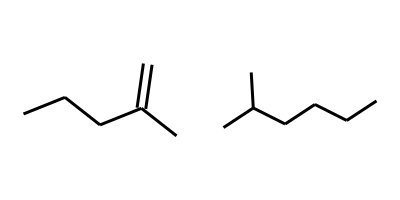

####################
mobley_313406~mobley_5627459
SEM: 0.17 kcal/mol


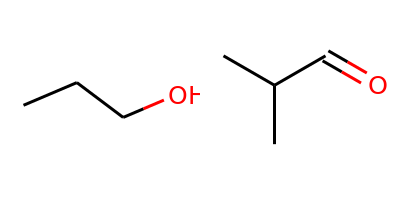

####################
mobley_296847~mobley_63712
SEM: 0.16 kcal/mol


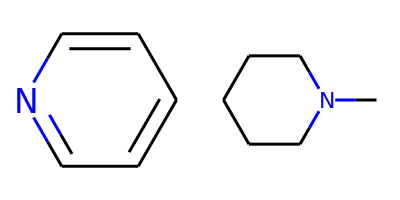

####################
mobley_4035953~mobley_9478823
SEM: 0.02 kcal/mol


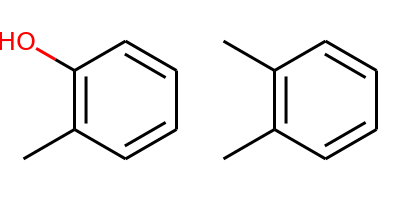

####################
mobley_8514745~mobley_3572203
SEM: 0.13 kcal/mol


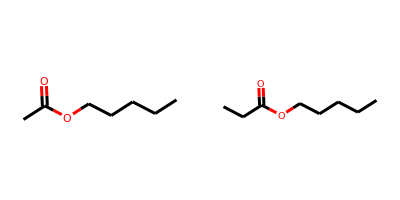

####################
mobley_1592519~mobley_2607611
SEM: 0.13 kcal/mol


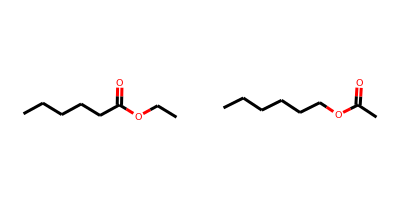

####################
mobley_4715906~mobley_2451097
SEM: 1.17 kcal/mol


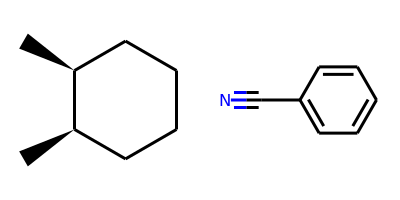

####################
mobley_900088~mobley_8739734
SEM: 0.09 kcal/mol


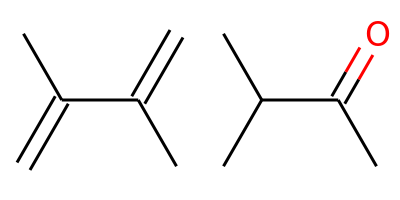

####################
mobley_9185328~mobley_1199854
SEM: 0.09 kcal/mol


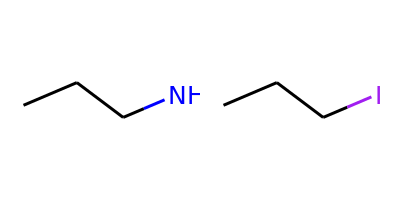

####################
mobley_5880265~mobley_2364370
SEM: 0.12 kcal/mol


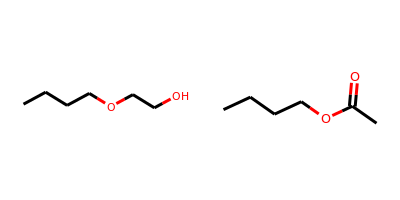

####################
mobley_6430250~mobley_7463799
SEM: 0.03 kcal/mol


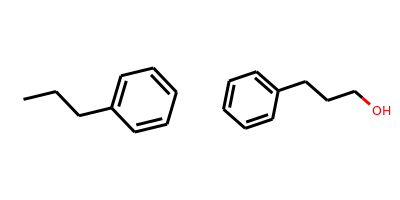

####################
mobley_6896128~mobley_5079234
SEM: 0.11 kcal/mol


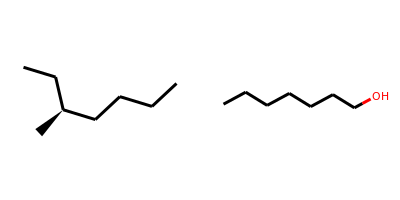

####################
mobley_8525830~mobley_1875719
SEM: 0.18 kcal/mol


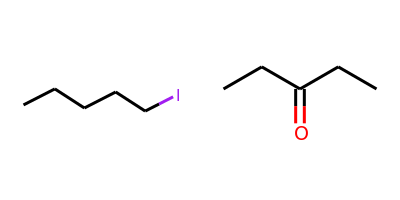

####################
mobley_4035953~mobley_8691603
SEM: 0.07 kcal/mol


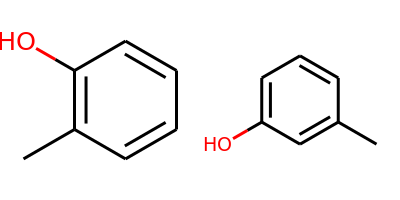

####################
mobley_3211679~mobley_6571751
SEM: 0.14 kcal/mol


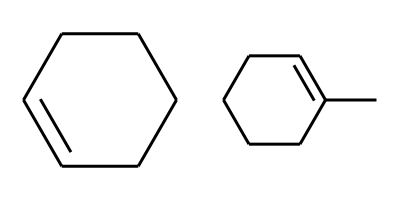

####################
mobley_8522124~mobley_4694328
SEM: 0.2 kcal/mol


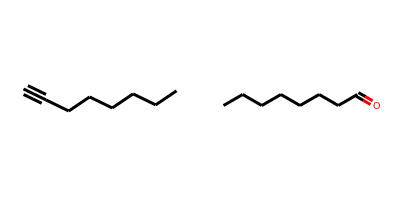

####################
mobley_1803862~mobley_7047032
SEM: 0.25 kcal/mol


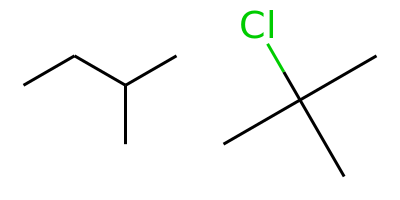

####################
mobley_8754702~mobley_6973347
SEM: 0.12 kcal/mol


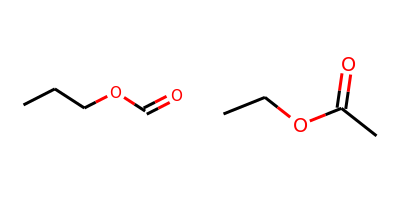

####################
mobley_1674094~mobley_6060301
SEM: 0.15 kcal/mol


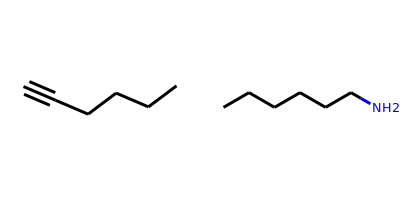

####################
mobley_1800170~mobley_8260524
SEM: 0.29 kcal/mol


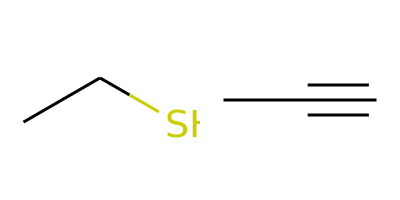

####################
mobley_8772587~mobley_1903702
SEM: 0.26 kcal/mol


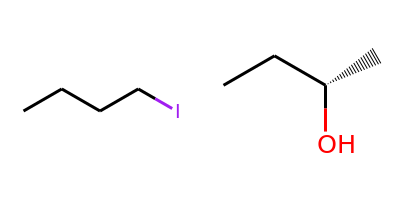

####################
mobley_6854178~mobley_8754702
SEM: 0.43 kcal/mol


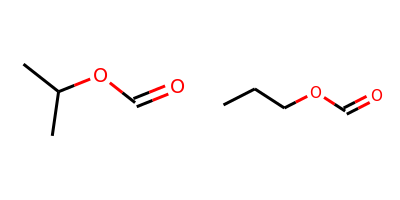

####################
mobley_9883303~mobley_4043987
SEM: 0.14 kcal/mol


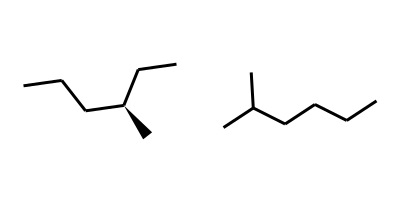

####################
mobley_36119~mobley_3378420
SEM: 0.06 kcal/mol


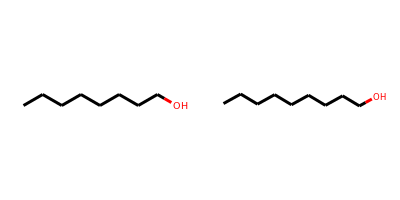

####################
mobley_2929847~mobley_4792268
SEM: 0.52 kcal/mol


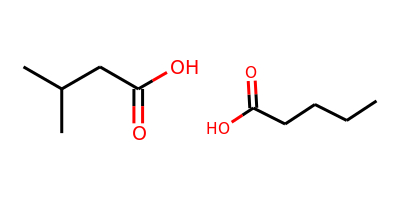

####################
mobley_2422586~mobley_3982371
SEM: 0.11 kcal/mol


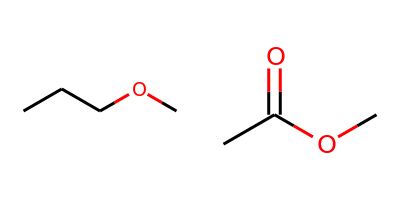

####################
mobley_5346580~mobley_7610437
SEM: 0.72 kcal/mol


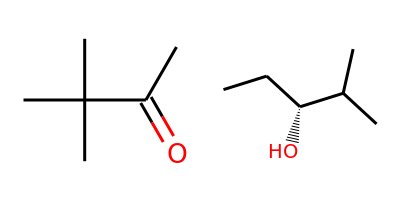

####################
mobley_778352~mobley_8772587
SEM: 0.16 kcal/mol


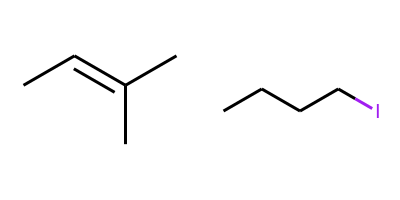

####################
mobley_3378420~mobley_1502181
SEM: 0.04 kcal/mol


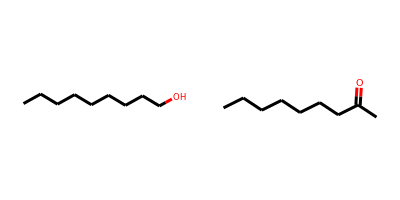

####################
mobley_2422586~mobley_8754702
SEM: 0.19 kcal/mol


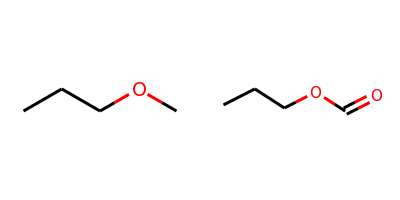

####################
mobley_820789~mobley_1881249
SEM: 0.07 kcal/mol


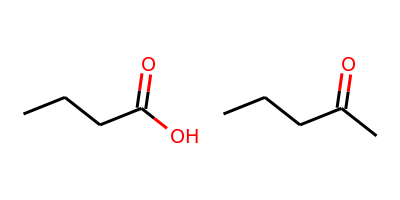

####################
mobley_5449201~mobley_1875719
SEM: 0.04 kcal/mol


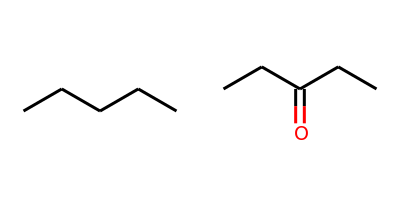

####################
mobley_9838013~mobley_8739734
SEM: 0.05 kcal/mol


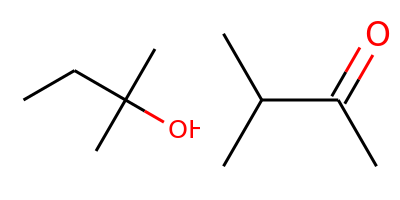

####################
mobley_525934~mobley_1800170
SEM: 0.13 kcal/mol


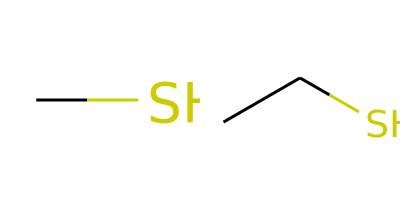

####################
mobley_4762983~mobley_7157427
SEM: 0.15 kcal/mol


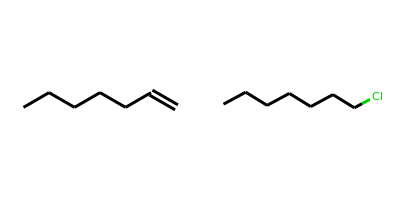

####################
mobley_8427539~mobley_6632459
SEM: 0.06 kcal/mol


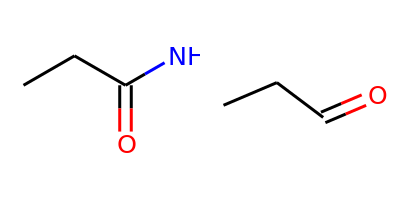

####################
mobley_4893032~mobley_2213823
SEM: 0.06 kcal/mol


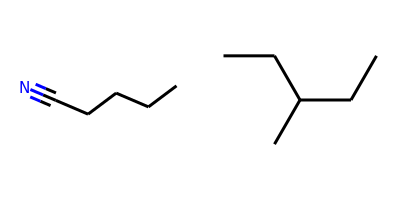

####################
mobley_8467917~mobley_7157427
SEM: 0.23 kcal/mol


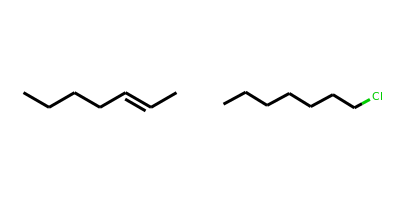

####################
mobley_1803862~mobley_9112978
SEM: 0.31 kcal/mol


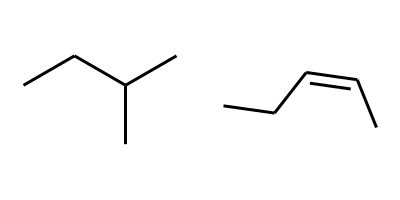

####################
mobley_3144334~mobley_2126135
SEM: 0.2 kcal/mol


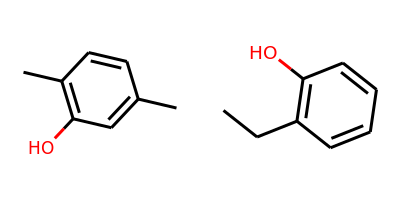

####################
mobley_9617923~mobley_3151666
SEM: 0.08 kcal/mol


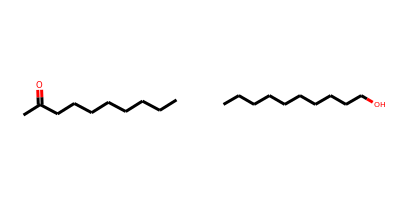

####################
mobley_6812653~mobley_2864987
SEM: 0.11 kcal/mol


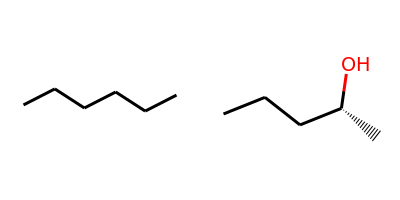

####################
mobley_8436428~mobley_9246215
SEM: 0.23 kcal/mol


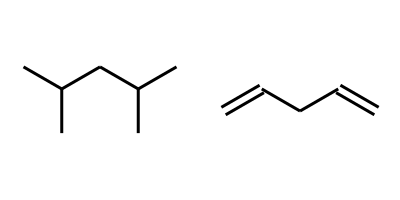

####################
mobley_3452749~mobley_8127829
SEM: 1.01 kcal/mol


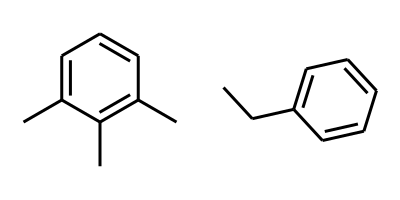

####################
mobley_4177472~mobley_2609604
SEM: 0.17 kcal/mol


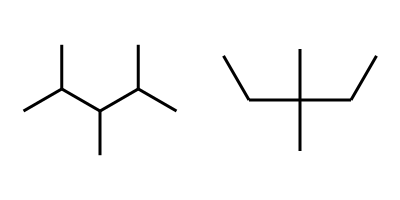

####################
mobley_5571660~mobley_5072416
SEM: 3.41 kcal/mol


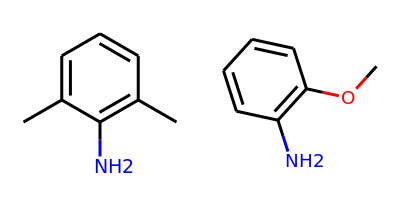

####################
mobley_900088~mobley_2245668
SEM: 0.11 kcal/mol


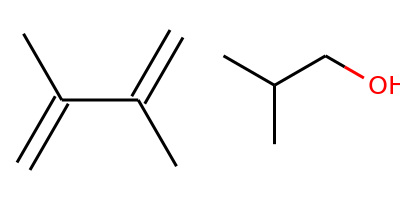

####################
mobley_7532833~mobley_6632459
SEM: 0.15 kcal/mol


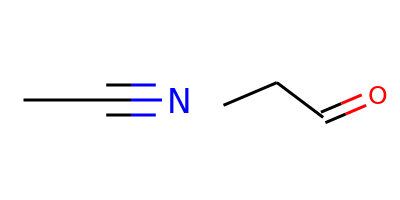

####################
mobley_7977115~mobley_5079234
SEM: 0.75 kcal/mol


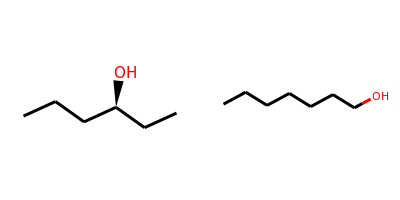

####################
mobley_3151666~mobley_4694328
SEM: 0.71 kcal/mol


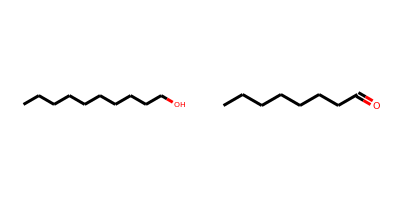

####################
mobley_1875719~mobley_3259411
SEM: 0.23 kcal/mol


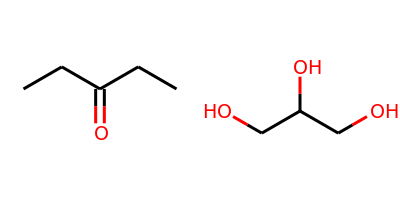

####################
mobley_8260524~mobley_9624458
SEM: 0.2 kcal/mol


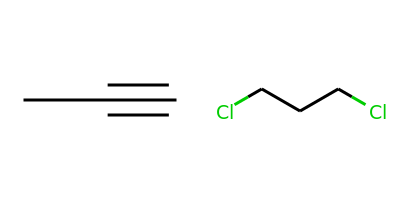

####################
mobley_1261349~mobley_313406
SEM: 0.13 kcal/mol


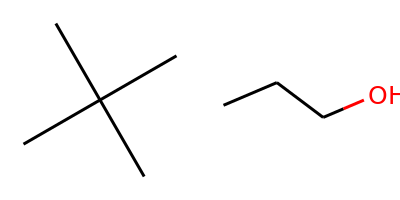

####################
mobley_3234716~mobley_852937
SEM: 0.04 kcal/mol


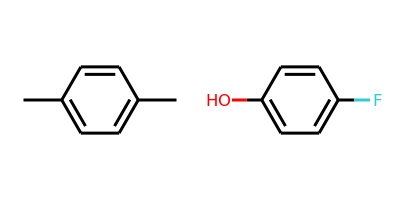

####################
mobley_7009711~mobley_2923700
SEM: 1.52 kcal/mol


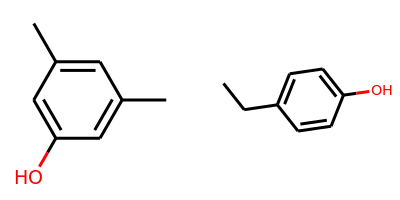

####################
mobley_8861672~mobley_1363784
SEM: 0.04 kcal/mol


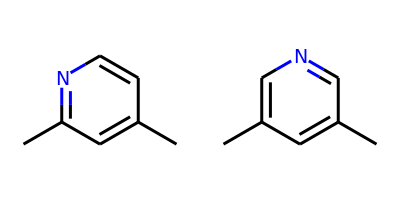

####################
mobley_4639255~mobley_2146331
SEM: 0.94 kcal/mol


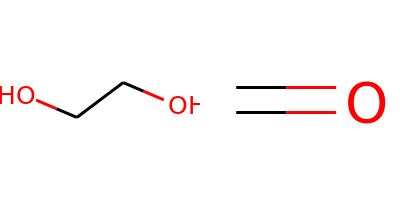

####################
mobley_3040612~mobley_2850833
SEM: 0.22 kcal/mol


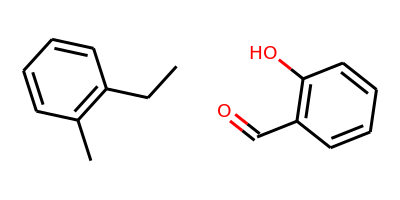

####################
mobley_1881249~mobley_2143011
SEM: 0.2 kcal/mol


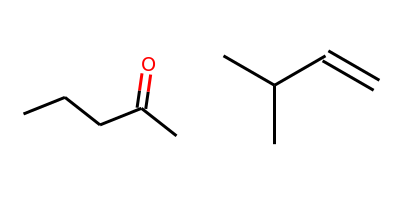

####################
mobley_1755375~mobley_2923700
SEM: 6.44 kcal/mol


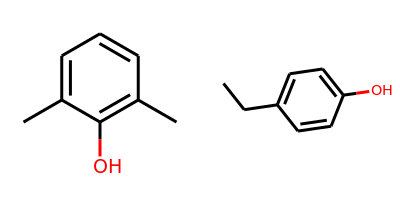

####################
mobley_1019269~mobley_627267
SEM: 0.16 kcal/mol


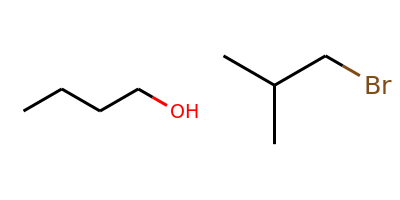

####################
mobley_1563176~mobley_9624458
SEM: 0.3 kcal/mol


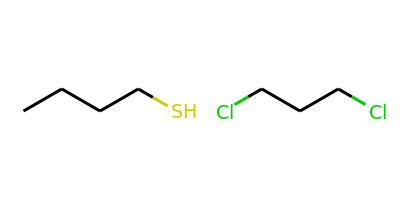

####################
mobley_1881249~mobley_8436428
SEM: 0.12 kcal/mol


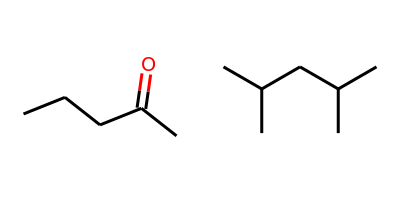

####################
mobley_4690963~mobley_9626434
SEM: 0.12 kcal/mol


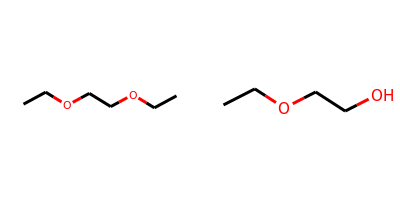

####################
mobley_3452749~mobley_2126135
SEM: 0.96 kcal/mol


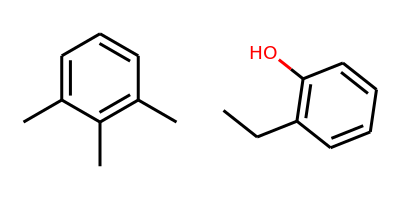

####################
mobley_5052949~mobley_9974966
SEM: 0.15 kcal/mol


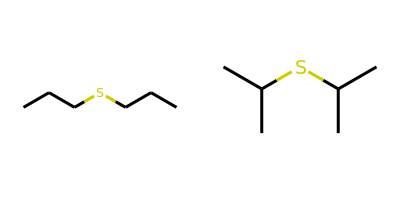

####################
mobley_1903702~mobley_8337977
SEM: 0.1 kcal/mol


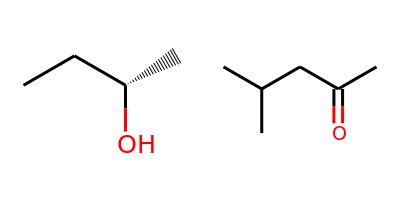

####################
mobley_5310099~mobley_9121449
SEM: 0.18 kcal/mol


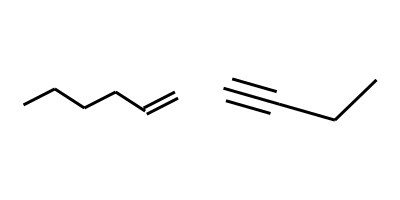

####################
mobley_2410897~mobley_1857976
SEM: 0.12 kcal/mol


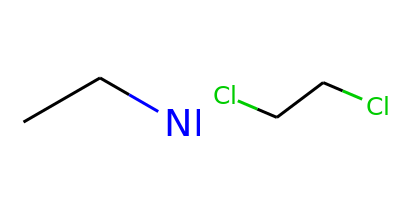

####################
mobley_2245668~mobley_9624458
SEM: 0.88 kcal/mol


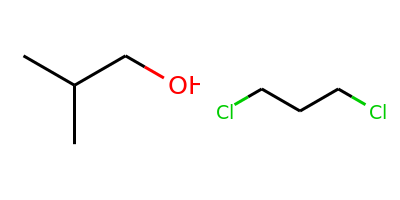

####################
mobley_7573149~mobley_8514745
SEM: 0.13 kcal/mol


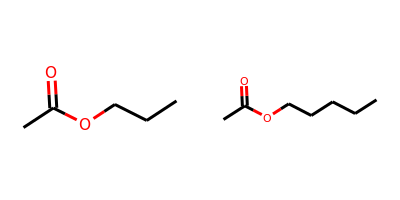

####################
mobley_4561957~mobley_8525830
SEM: 0.21 kcal/mol


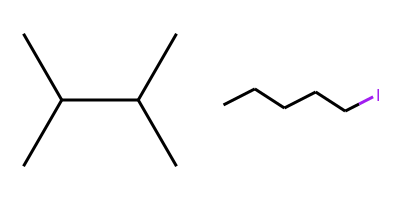

####################
mobley_430089~mobley_252413
SEM: 0.17 kcal/mol


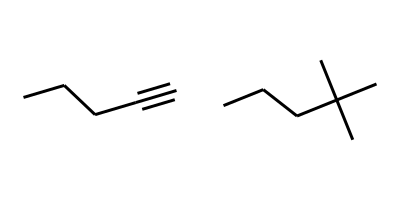

####################
mobley_7769613~mobley_6497672
SEM: 0.26 kcal/mol


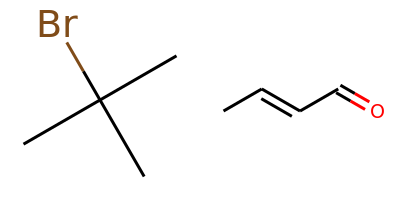

####################
mobley_1875719~mobley_8427539
SEM: 0.14 kcal/mol


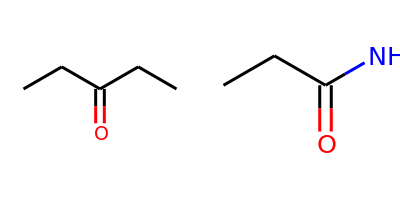

####################
mobley_5973402~mobley_2422586
SEM: 0.06 kcal/mol


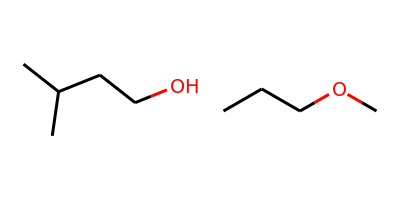

####################
mobley_3144334~mobley_1987439
SEM: 0.16 kcal/mol


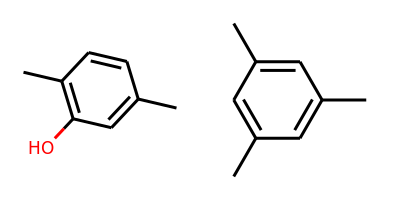

####################
mobley_3187514~mobley_2689721
SEM: 0.4 kcal/mol


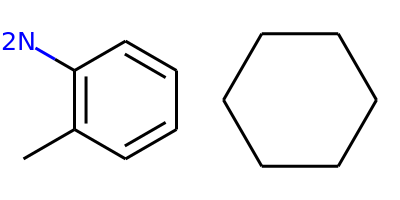

####################
mobley_1875719~mobley_778352
SEM: 0.19 kcal/mol


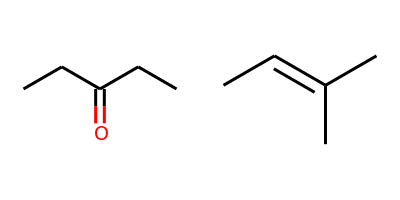

####################
mobley_7610437~mobley_7142697
SEM: 0.22 kcal/mol


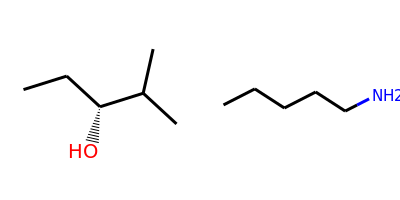

####################
mobley_8118832~mobley_9913368
SEM: 0.44 kcal/mol


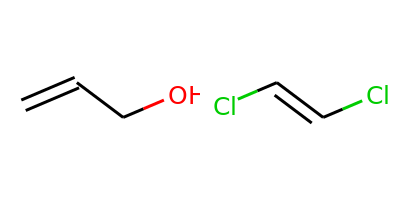

####################
mobley_4780078~mobley_9478823
SEM: 0.09 kcal/mol


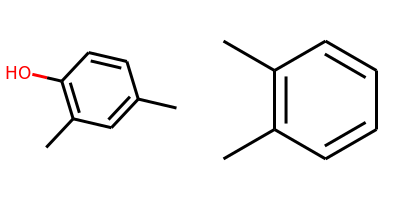

####################
mobley_525934~mobley_4364398
SEM: 0.12 kcal/mol


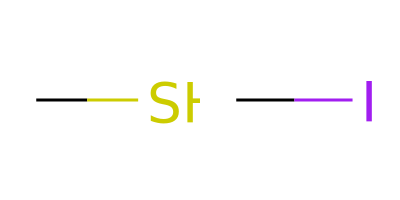

####################
mobley_5571660~mobley_2451097
SEM: 0.17 kcal/mol


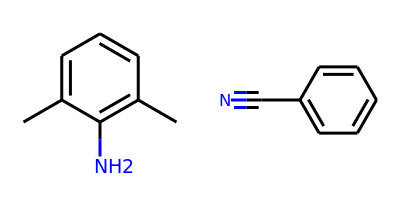

####################
mobley_313406~mobley_7047032
SEM: 0.1 kcal/mol


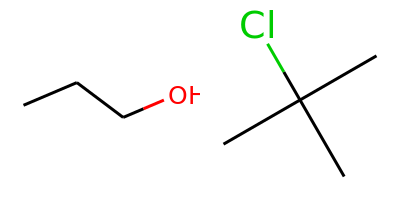

####################
mobley_2609604~mobley_7610437
SEM: 0.16 kcal/mol


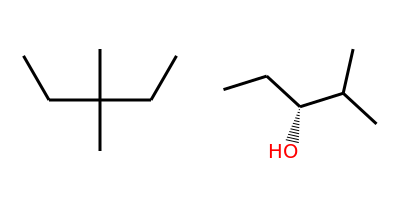

####################
mobley_6571751~mobley_7497999
SEM: 0.66 kcal/mol


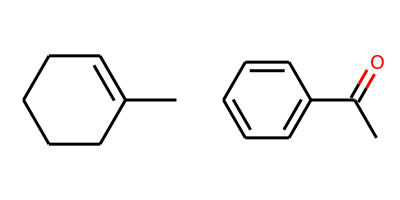

####################
mobley_1733799~mobley_1189457
SEM: 0.55 kcal/mol


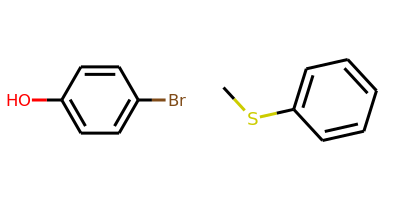

####################
mobley_859464~mobley_5880265
SEM: 0.11 kcal/mol


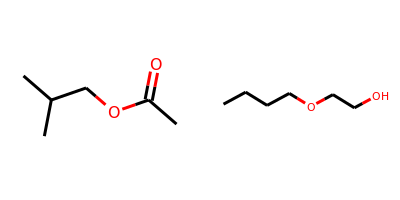

####################
mobley_7200804~mobley_4494568
SEM: 0.3 kcal/mol


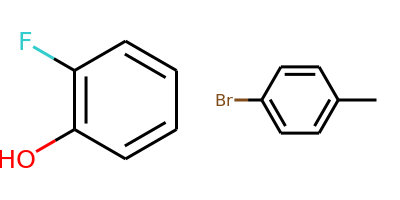

####################
mobley_2390199~mobley_36119
SEM: 0.46 kcal/mol


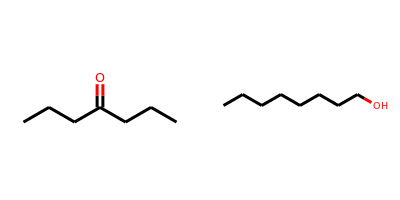

####################
mobley_1502181~mobley_819018
SEM: 0.37 kcal/mol


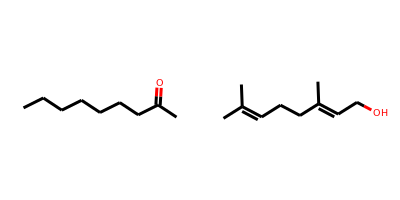

####################
mobley_1674094~mobley_7983227
SEM: 0.19 kcal/mol


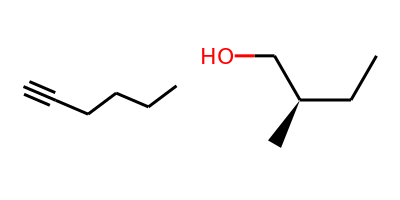

####################
mobley_5518547~mobley_7497999
SEM: 2.25 kcal/mol


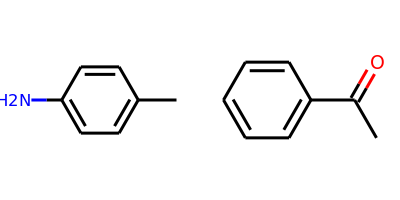

####################
mobley_8573194~mobley_8525830
SEM: 0.11 kcal/mol


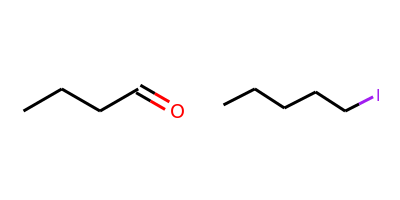

####################
mobley_2859600~mobley_7988076
SEM: 0.06 kcal/mol


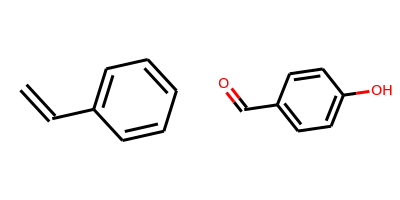

####################
mobley_3969312~mobley_1036761
SEM: 0.14 kcal/mol


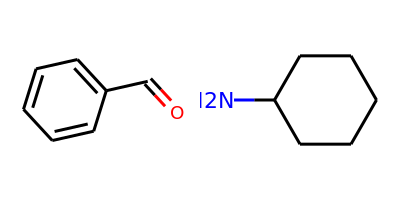

####################
mobley_5759258~mobley_5123639
SEM: 0.09 kcal/mol


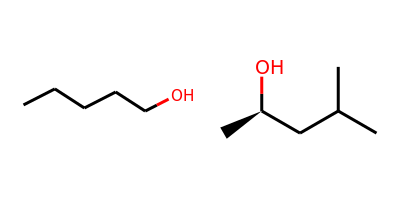

####################
mobley_2792521~mobley_9197172
SEM: 0.22 kcal/mol


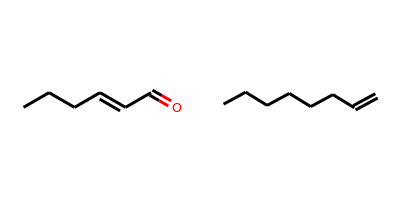

####################
mobley_5627459~mobley_8260524
SEM: 0.1 kcal/mol


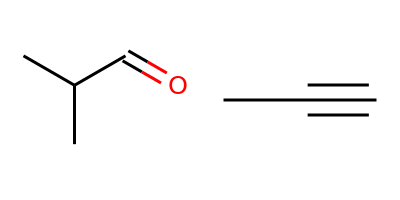

####################
mobley_2143011~mobley_8337977
SEM: 0.17 kcal/mol


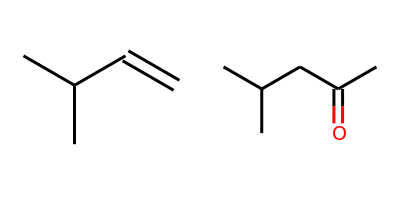

####################
mobley_4035953~mobley_2489709
SEM: 0.24 kcal/mol


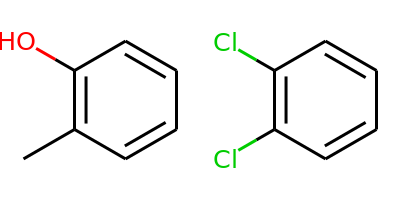

####################
mobley_8573194~mobley_7977115
SEM: 0.75 kcal/mol


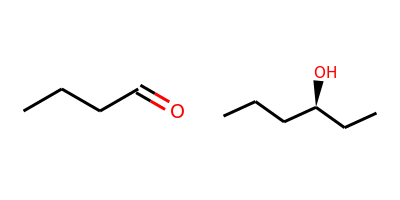

####################
mobley_3682850~mobley_755351
SEM: 2.15 kcal/mol


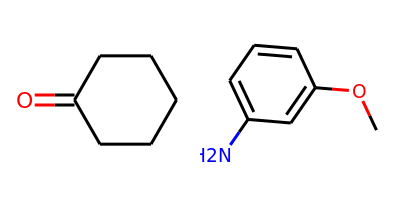

####################
mobley_3414356~mobley_3738859
SEM: 0.2 kcal/mol


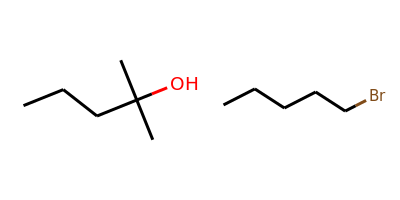

####################
mobley_1827204~mobley_8573194
SEM: 0.13 kcal/mol


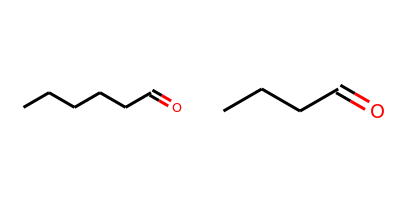

####################
mobley_8739734~mobley_4893032
SEM: 0.1 kcal/mol


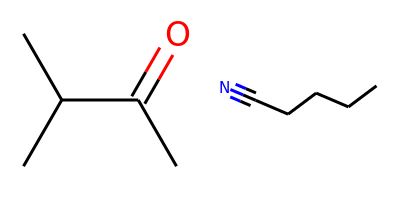

####################
mobley_2929847~mobley_8573194
SEM: 0.05 kcal/mol


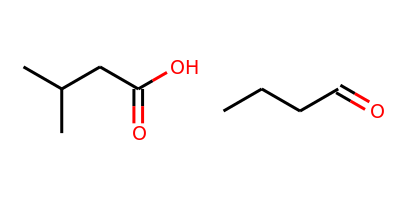

####################
mobley_2609604~mobley_1139153
SEM: 0.33 kcal/mol


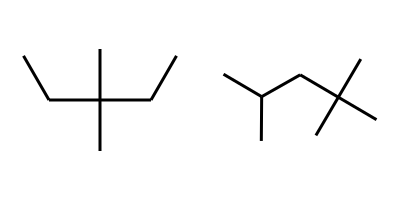

####################
mobley_8436428~mobley_900088
SEM: 0.59 kcal/mol


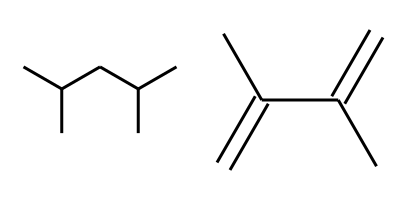

####################
mobley_5311804~mobley_4553008
SEM: 1.84 kcal/mol


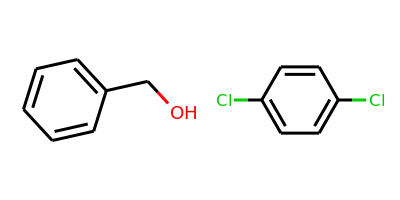

####################
mobley_3370989~mobley_1144156
SEM: 0.07 kcal/mol


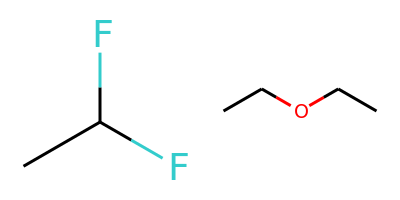

####################
mobley_7227357~mobley_4177472
SEM: 0.16 kcal/mol


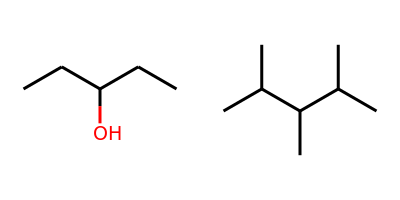

####################
mobley_2929847~mobley_6060301
SEM: 1.12 kcal/mol


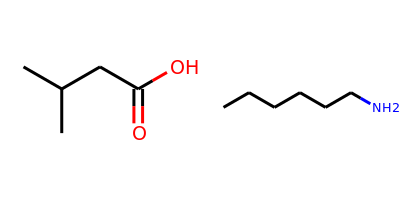

####################
mobley_4218209~mobley_3746675
SEM: 0.08 kcal/mol


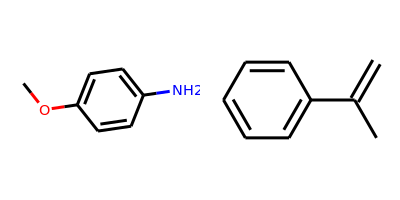

####################
mobley_9246351~mobley_2784376
SEM: 1.46 kcal/mol


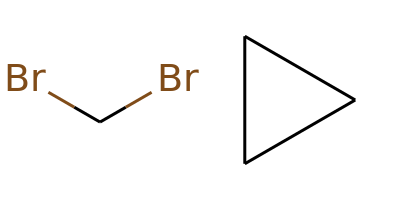

####################
mobley_1662128~mobley_4792268
SEM: 1.0 kcal/mol


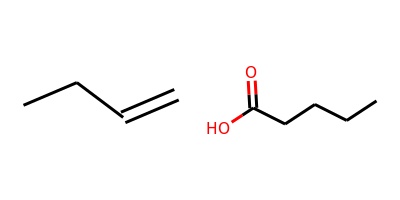

####################
mobley_664966~mobley_303222
SEM: 0.66 kcal/mol


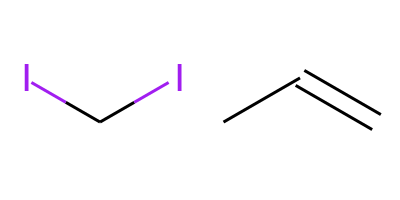

####################
mobley_6060301~mobley_1019269
SEM: 0.46 kcal/mol


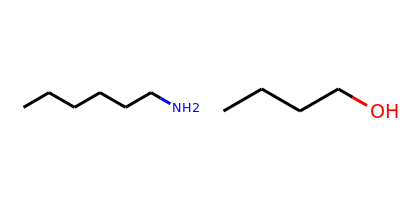

####################
mobley_8221999~mobley_2310185
SEM: 0.11 kcal/mol


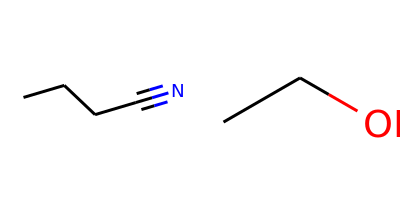

####################
mobley_900088~mobley_6854178
SEM: 0.29 kcal/mol


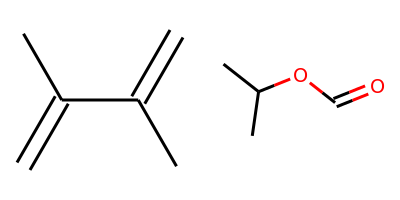

####################
mobley_2310185~mobley_3083321
SEM: 0.14 kcal/mol


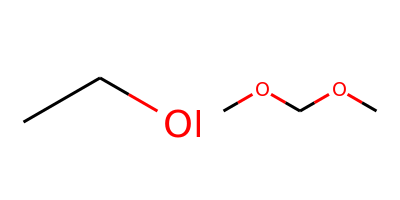

####################
mobley_6175884~mobley_5094777
SEM: 0.35 kcal/mol


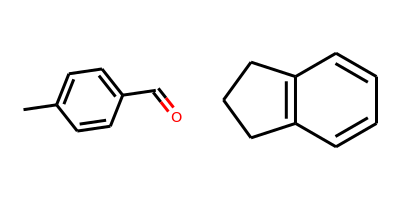

####################
mobley_6978427~mobley_3144334
SEM: 32.0 kcal/mol


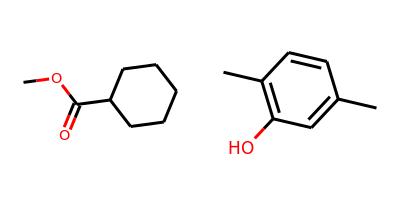

####################
mobley_6632459~mobley_5935995
SEM: 0.06 kcal/mol


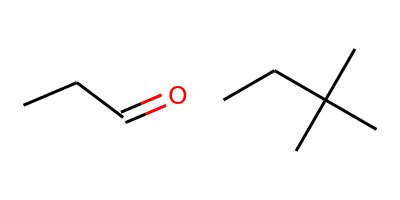

####################
mobley_5346580~mobley_6497672
SEM: 0.47 kcal/mol


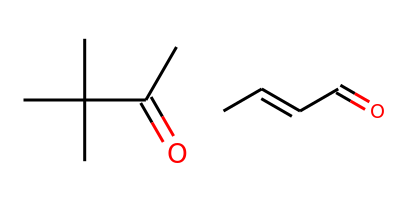

####################
mobley_7203421~mobley_2929847
SEM: 0.76 kcal/mol


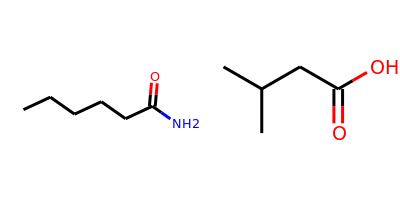

####################
mobley_4043951~mobley_7859387
SEM: 0.19 kcal/mol


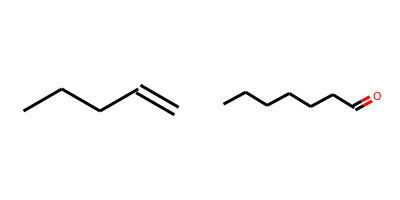

####################
mobley_3398536~mobley_7688753
SEM: 0.07 kcal/mol


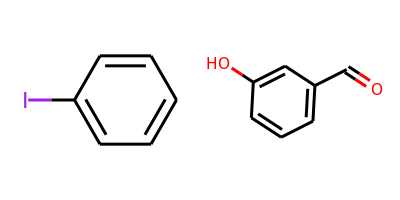

####################
mobley_5692472~mobley_9029594
SEM: 0.02 kcal/mol


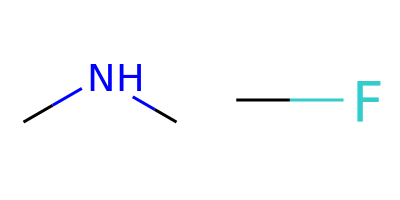

####################
mobley_2341732~mobley_8573194
SEM: 0.17 kcal/mol


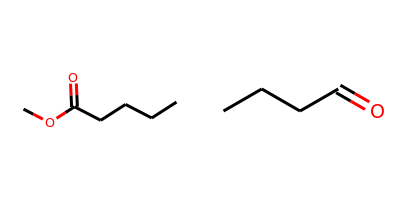

####################
mobley_5759258~mobley_3006808
SEM: 0.94 kcal/mol


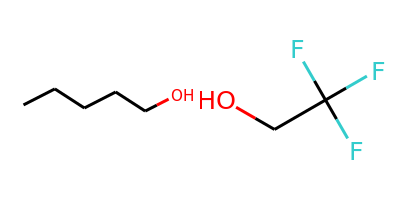

####################
mobley_627267~mobley_4043987
SEM: 0.08 kcal/mol


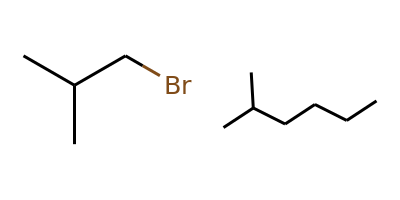

####################
mobley_4762983~mobley_778352
SEM: 0.37 kcal/mol


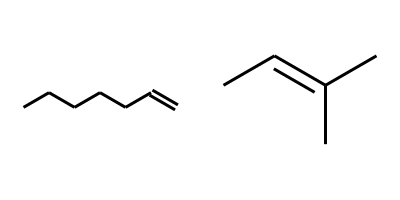

####################
mobley_1881249~mobley_7542832
SEM: 0.12 kcal/mol


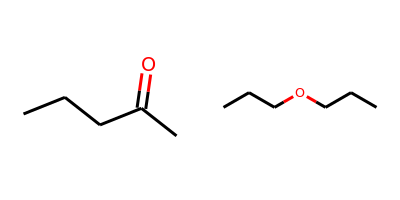

####################
mobley_8691603~mobley_5616693
SEM: 2.21 kcal/mol


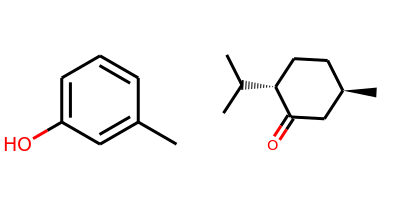

####################
mobley_1650157~mobley_1792062
SEM: 0.39 kcal/mol


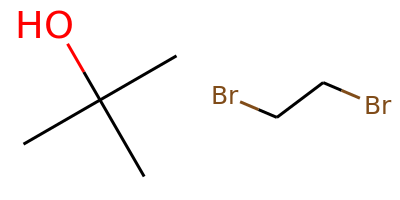

####################
mobley_7599023~mobley_7009711
SEM: 0.4 kcal/mol


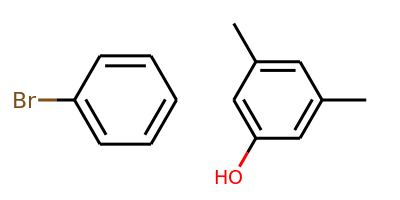

####################
mobley_2929847~mobley_4013838
SEM: 0.14 kcal/mol


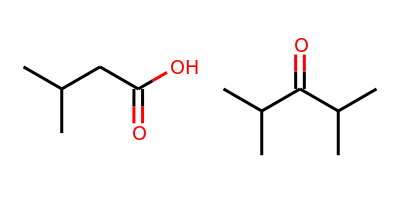

####################
mobley_900088~mobley_3546460
SEM: 0.82 kcal/mol


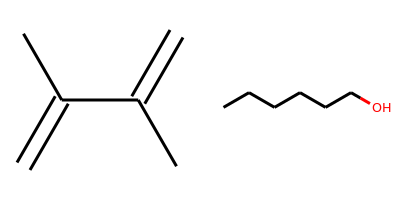

####################
mobley_3709920~mobley_2792521
SEM: 0.66 kcal/mol


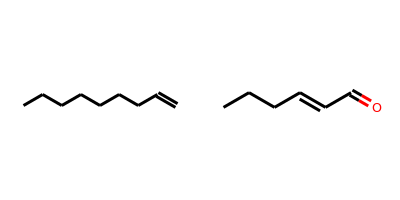

####################
mobley_7015518~mobley_303222
SEM: 0.23 kcal/mol


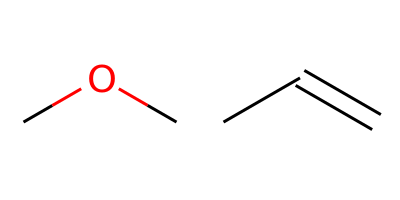

####################
mobley_1728386~mobley_5094777
SEM: 0.28 kcal/mol


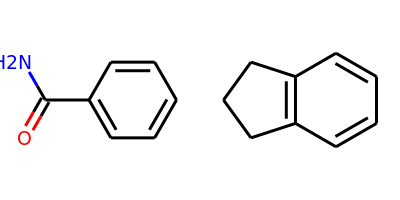

####################
mobley_7497999~mobley_7608462
SEM: 0.16 kcal/mol


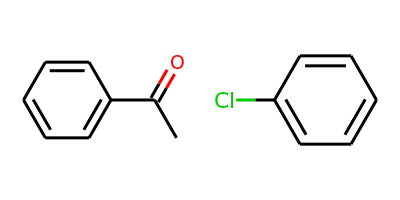

####################
mobley_6917738~mobley_5759258
SEM: 0.16 kcal/mol


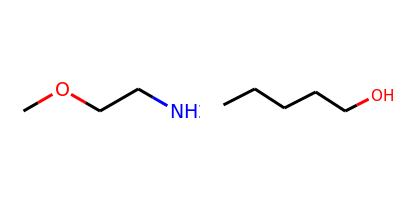

####################
mobley_2609604~mobley_5157661
SEM: 0.09 kcal/mol


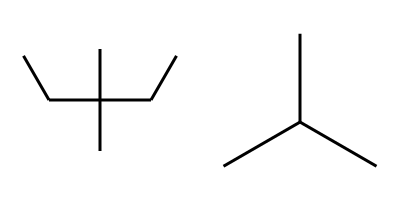

####################
mobley_9942801~mobley_2763835
SEM: 2.17 kcal/mol


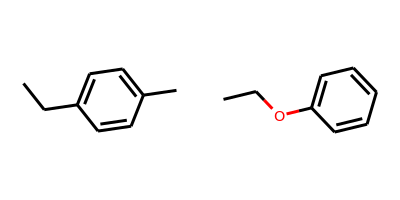

####################
mobley_5973402~mobley_186894
SEM: 0.31 kcal/mol


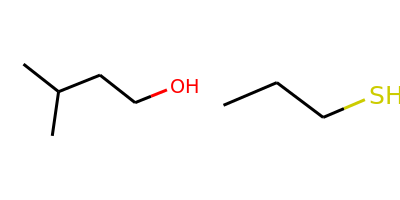

####################
mobley_4893032~mobley_9197172
SEM: 0.12 kcal/mol


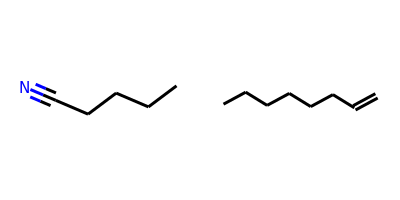

####################
mobley_3259411~mobley_7455579
SEM: 0.19 kcal/mol


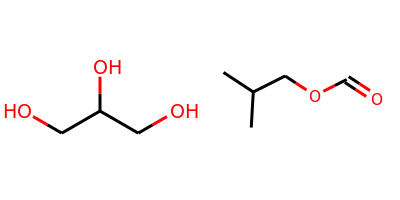

####################
mobley_8426916~mobley_5157661
SEM: 0.09 kcal/mol


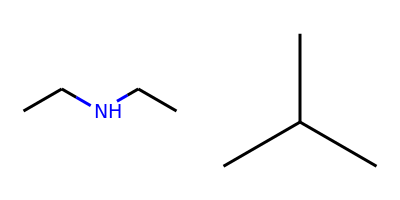

####################
mobley_2929847~mobley_4762983
SEM: 0.1 kcal/mol


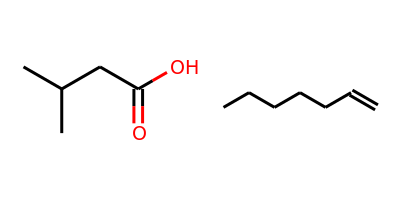

####################
mobley_3515580~mobley_8723116
SEM: 2.61 kcal/mol


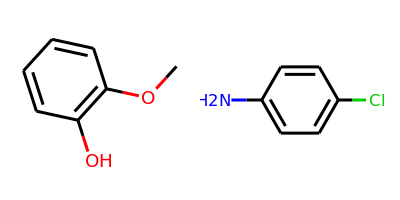

####################
mobley_1019269~mobley_994483
SEM: 0.4 kcal/mol


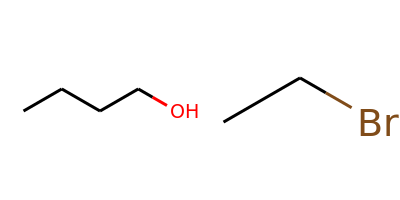

####################
mobley_7106722~mobley_7455579
SEM: 0.06 kcal/mol


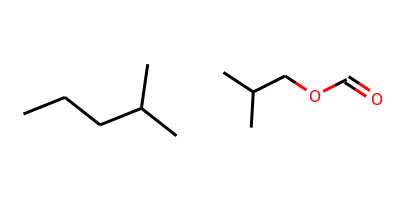

####################
mobley_3982371~mobley_1792062
SEM: 0.34 kcal/mol


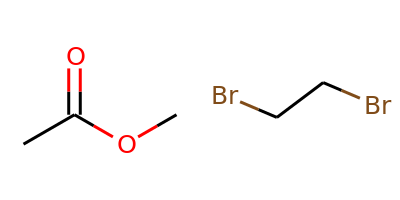

####################
mobley_2864987~mobley_2068538
SEM: 0.66 kcal/mol


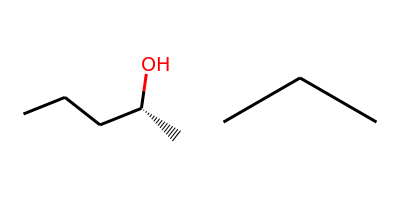

####################
mobley_4759887~mobley_5449201
SEM: 0.18 kcal/mol


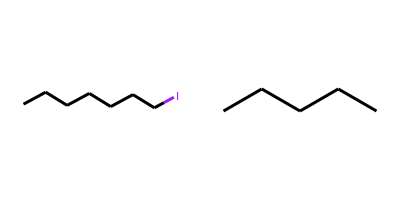

####################
mobley_7227357~mobley_7708038
SEM: 0.11 kcal/mol


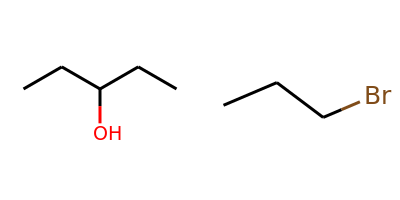

####################
mobley_2294995~mobley_8260524
SEM: 0.24 kcal/mol


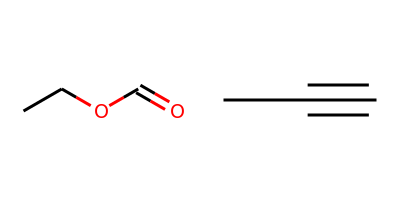

####################
mobley_632905~mobley_397645
SEM: 0.9 kcal/mol


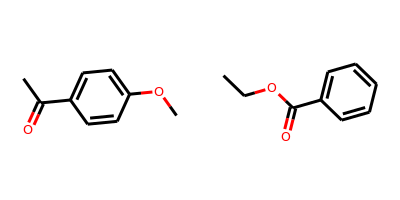

####################
mobley_7977115~mobley_8427539
SEM: 0.65 kcal/mol


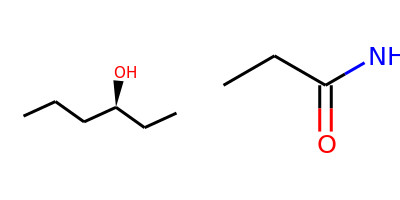

####################
mobley_5518547~mobley_7463799
SEM: 1.02 kcal/mol


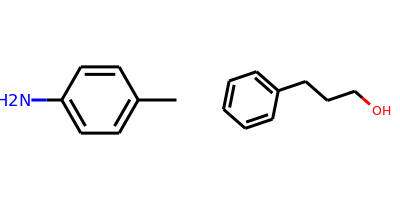

####################
mobley_8467917~mobley_8765203
SEM: 0.89 kcal/mol


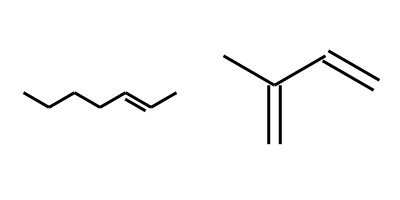

####################
mobley_7690440~mobley_2784376
SEM: 0.5 kcal/mol


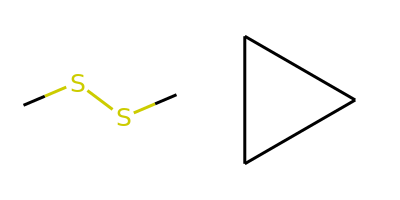

####################
mobley_3690931~mobley_4690963
SEM: 0.25 kcal/mol


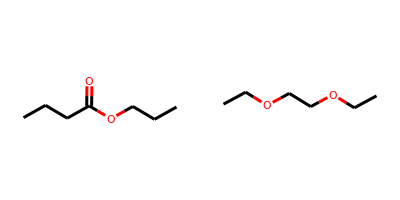

####################
mobley_859464~mobley_8492526
SEM: 0.24 kcal/mol


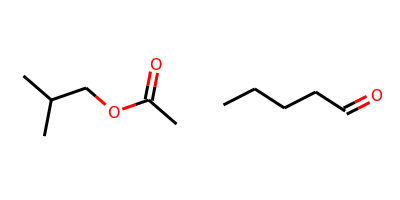

####################
mobley_2068538~mobley_5732611
SEM: 0.34 kcal/mol


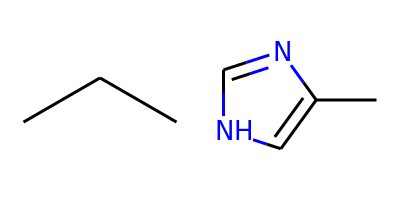

####################
mobley_6060301~mobley_7455579
SEM: 0.45 kcal/mol


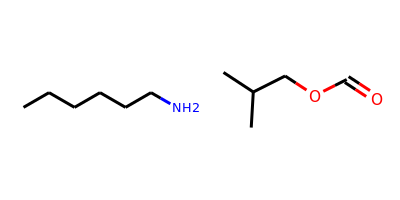

####################
mobley_8668219~mobley_4694328
SEM: 1.06 kcal/mol


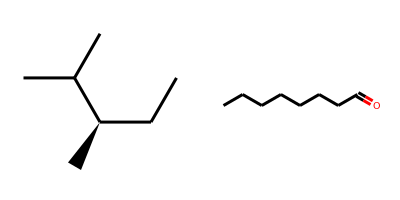

####################
mobley_9434451~mobley_1717215
SEM: 0.07 kcal/mol


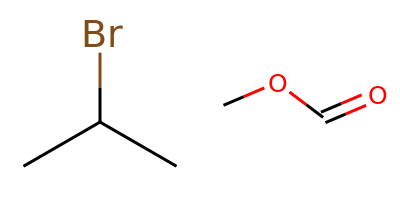

####################
mobley_4983965~mobley_5690766
SEM: 0.15 kcal/mol


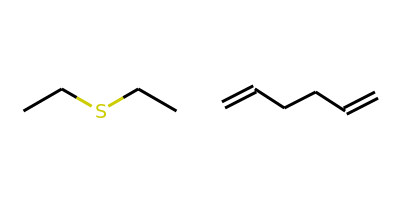

####################
mobley_5390332~mobley_8705848
SEM: 0.08 kcal/mol


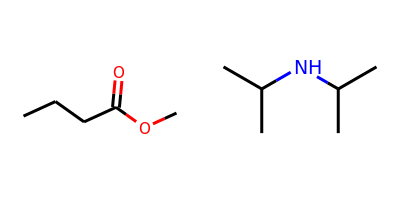

####################
mobley_7769613~mobley_9626434
SEM: 0.74 kcal/mol


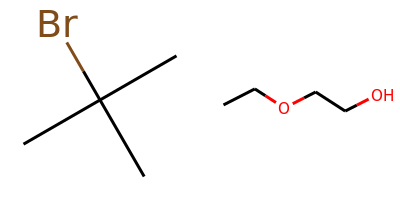

####################
mobley_9015240~mobley_1881249
SEM: 0.2 kcal/mol


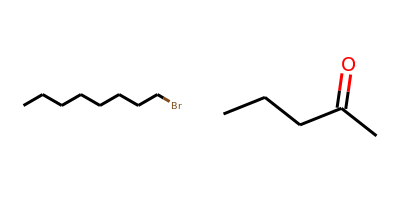

####################
mobley_4690963~mobley_8514745
SEM: 0.33 kcal/mol


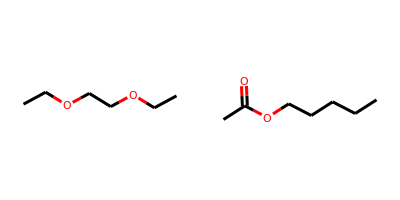

####################
mobley_718988~mobley_7608435
SEM: 0.14 kcal/mol


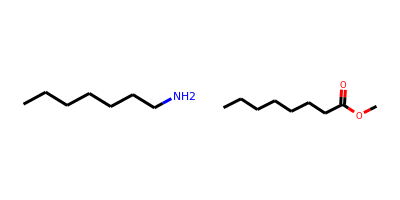

####################
mobley_1017962~mobley_550662
SEM: 0.25 kcal/mol


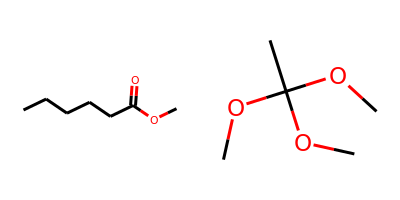

####################
mobley_8221999~mobley_9626434
SEM: 0.95 kcal/mol


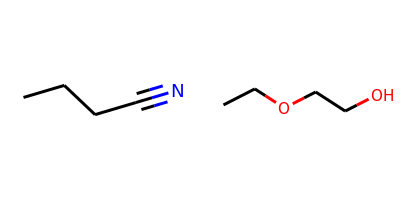

####################
mobley_929676~mobley_6619554
SEM: 0.13 kcal/mol


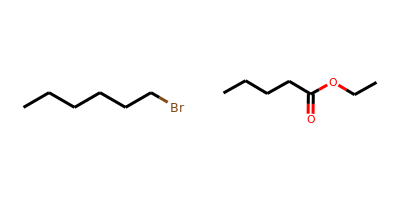

####################
mobley_628086~mobley_3546460
SEM: 0.86 kcal/mol


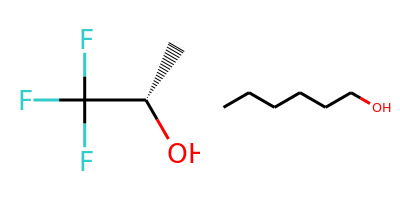

####################
mobley_2183616~mobley_3398536
SEM: 0.29 kcal/mol


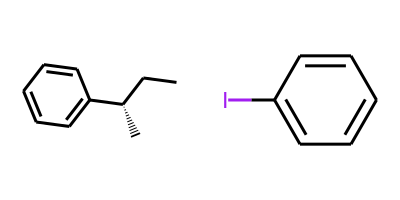

####################
mobley_5390332~mobley_7099614
SEM: 0.19 kcal/mol


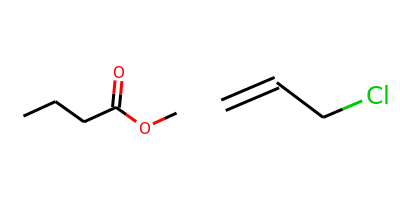

####################
mobley_5692472~mobley_5499659
SEM: 0.19 kcal/mol


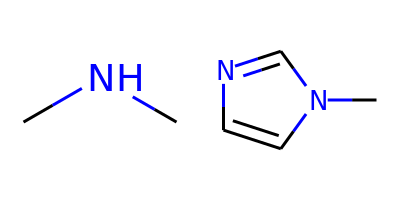

####################
mobley_5935995~mobley_2364370
SEM: 0.24 kcal/mol


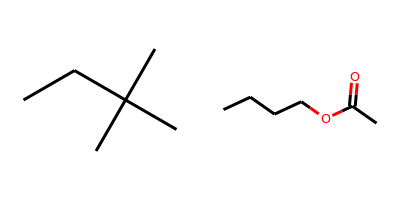

####################
mobley_1075836~mobley_2198613
SEM: 0.1 kcal/mol


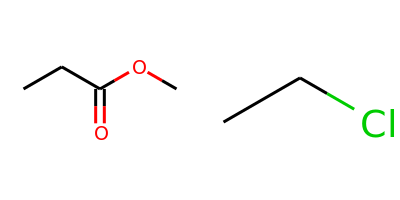

####################
mobley_2341732~mobley_2958326
SEM: 0.11 kcal/mol


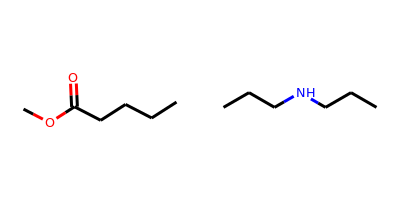

####################
mobley_7532833~mobley_4043987
SEM: 0.2 kcal/mol


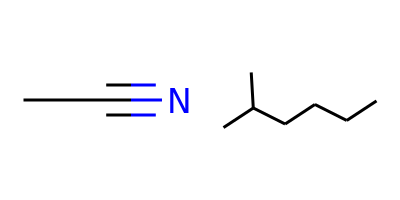

####################
mobley_3325209~mobley_2659552
SEM: 0.15 kcal/mol


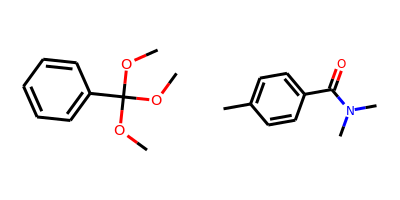

####################
mobley_2782339~mobley_4395315
SEM: 0.43 kcal/mol


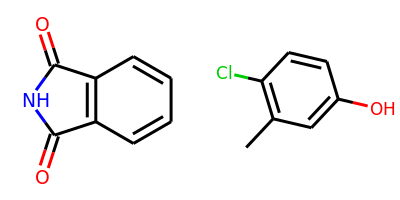

####################
mobley_1967551~mobley_2725802
SEM: 0.08 kcal/mol


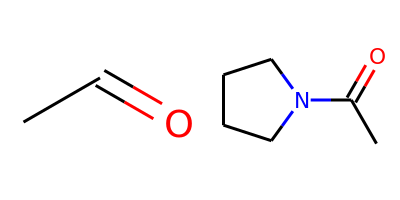

####################
mobley_676247~mobley_1803862
SEM: 0.18 kcal/mol


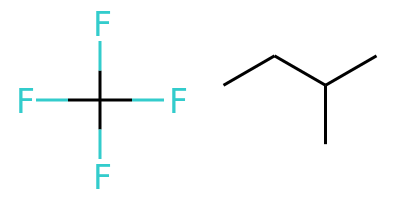

####################
mobley_9794857~mobley_2043882
SEM: 0.26 kcal/mol


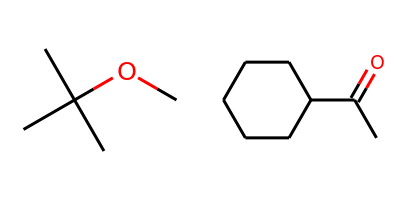

####################
mobley_1363784~mobley_9246215
SEM: 0.23 kcal/mol


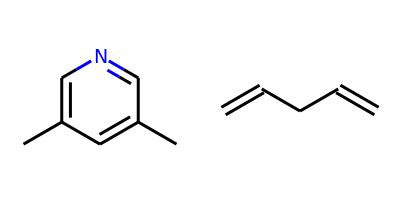

####################
mobley_9507933~mobley_3234716
SEM: 0.02 kcal/mol


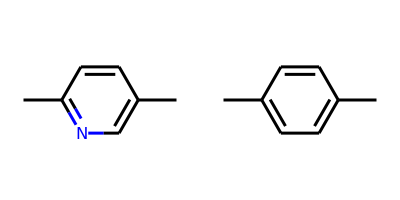

####################
mobley_1659169~mobley_7532833
SEM: 0.19 kcal/mol


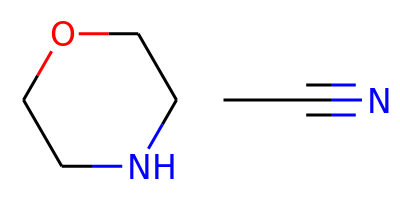

####################
mobley_9979854~mobley_129464
SEM: 0.04 kcal/mol


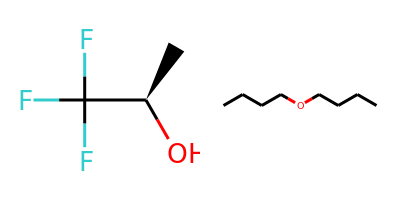

####################
mobley_6353617~mobley_1858644
SEM: 0.26 kcal/mol


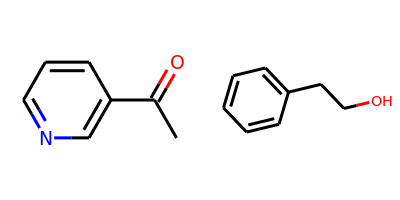

####################
mobley_3187514~mobley_4584540
SEM: 43.75 kcal/mol


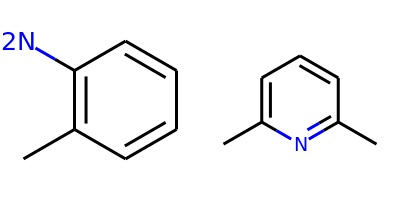

####################
mobley_6988468~mobley_2354112
SEM: 0.01 kcal/mol


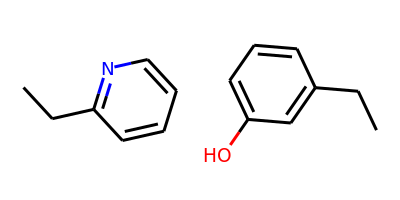

####################
mobley_4683624~mobley_6102880
SEM: 12.82 kcal/mol


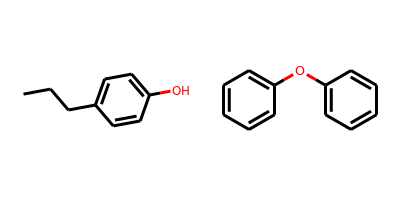

####################
mobley_2972906~mobley_5056289
SEM: 0.14 kcal/mol


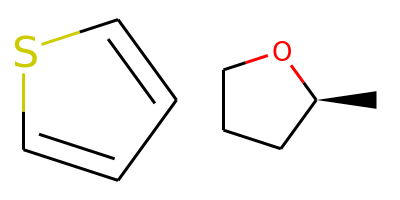

####################
mobley_20524~mobley_1199854
SEM: 0.75 kcal/mol


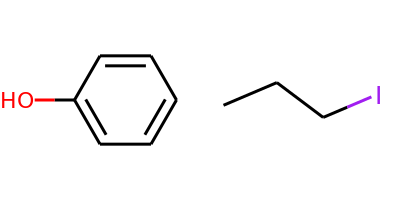

####################
mobley_7417968~mobley_1976156
SEM: 0.13 kcal/mol


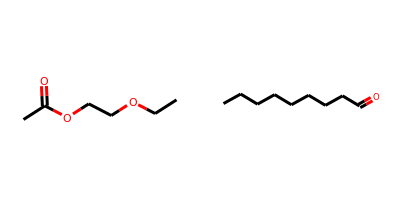

####################
mobley_1755375~mobley_1827204
SEM: 0.14 kcal/mol


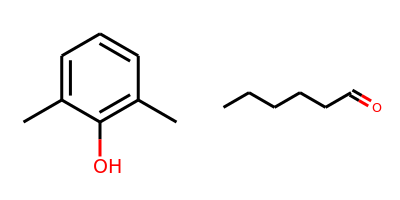

####################
mobley_9565165~mobley_9942801
SEM: 21.32 kcal/mol


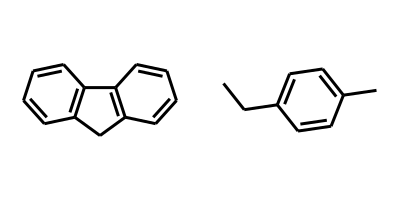

####################
mobley_6175884~mobley_5852491
SEM: 0.3 kcal/mol


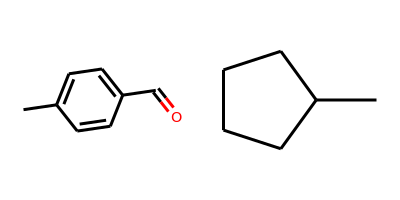

####################
mobley_8118832~mobley_2771569
SEM: 0.93 kcal/mol


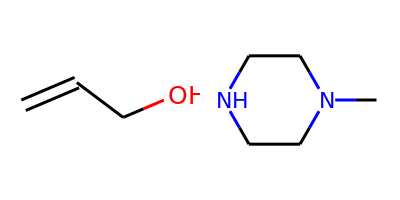

####################
mobley_1963873~mobley_3515580
SEM: 0.33 kcal/mol


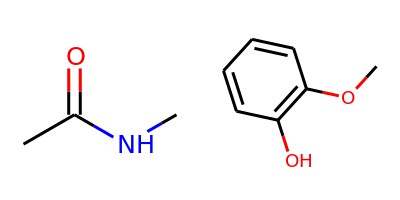

####################
mobley_4762983~mobley_3762186
SEM: 0.32 kcal/mol


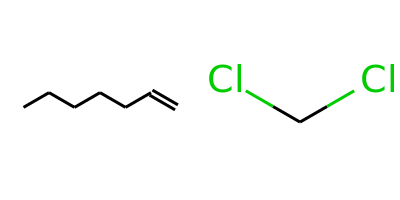

####################
mobley_8899867~mobley_4291494
SEM: 0.54 kcal/mol


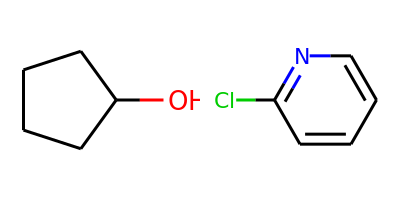

####################
mobley_4463913~mobley_900088
SEM: 0.43 kcal/mol


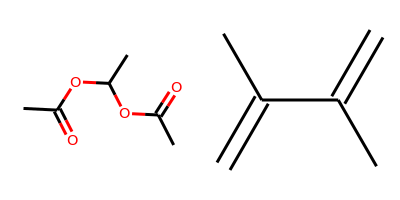

####################
mobley_5006685~mobley_1875719
SEM: 0.44 kcal/mol


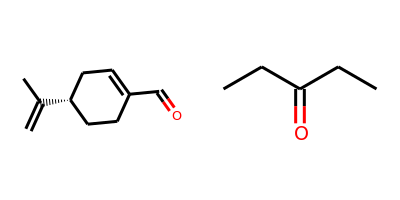

####################
mobley_9209581~mobley_6303022
SEM: 0.87 kcal/mol


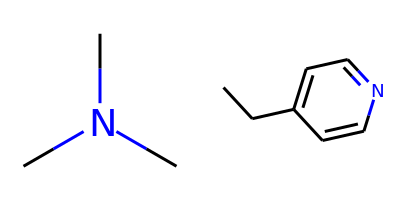

####################
mobley_7150646~mobley_7047032
SEM: 0.11 kcal/mol


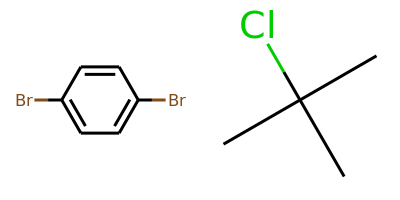

####################
mobley_9246351~mobley_550662
SEM: 1.01 kcal/mol


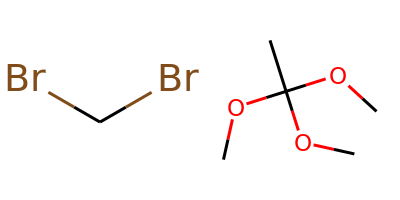

####################
mobley_7261305~mobley_1760914
SEM: 0.58 kcal/mol


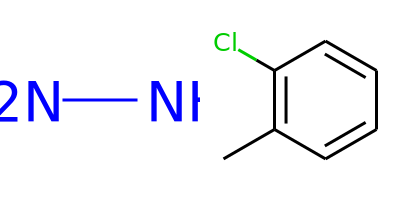

####################
mobley_3183805~mobley_2972345
SEM: 19.98 kcal/mol


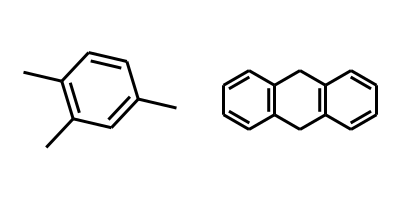

####################
mobley_2197088~mobley_1857976
SEM: 0.08 kcal/mol


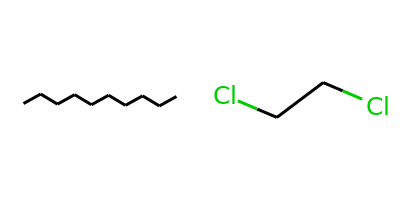

####################
mobley_9246351~mobley_6988468
SEM: 0.67 kcal/mol


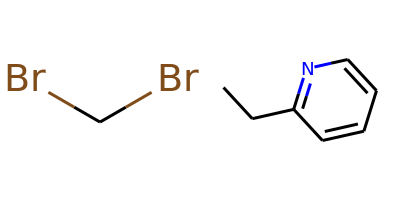

####################
mobley_4364398~mobley_3144334
SEM: 1.55 kcal/mol


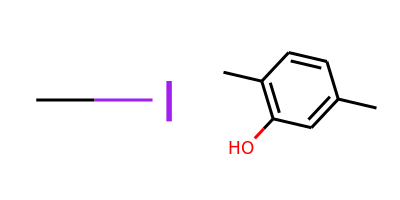

####################
mobley_627267~mobley_1046331
SEM: 0.16 kcal/mol


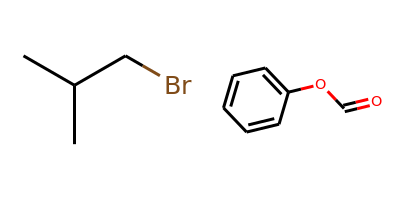

####################
mobley_9029594~mobley_1017962
SEM: 0.23 kcal/mol


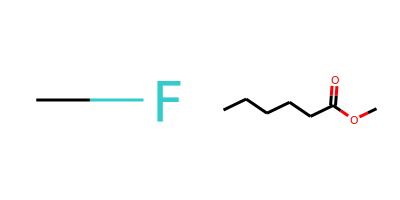

####################
mobley_1929982~mobley_36119
SEM: 1.95 kcal/mol


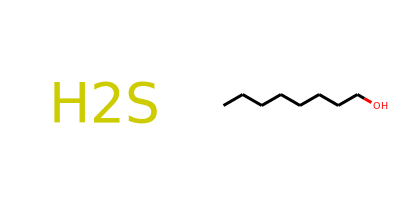

####################
mobley_8337722~mobley_1107178
SEM: 0.57 kcal/mol


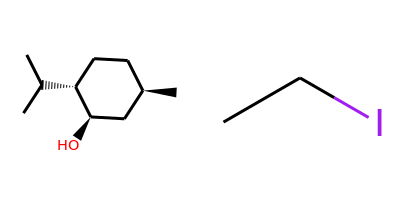

####################
mobley_2068538~mobley_755351
SEM: 3.69 kcal/mol


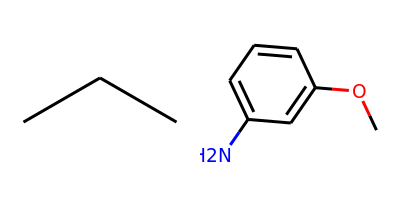

####################
mobley_9414831~mobley_9507933
SEM: 64.47 kcal/mol


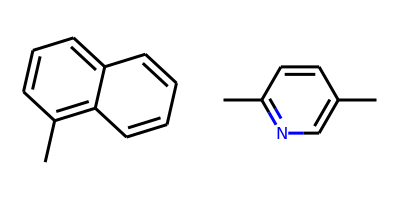

####################
mobley_6353617~mobley_6843802
SEM: 12.01 kcal/mol


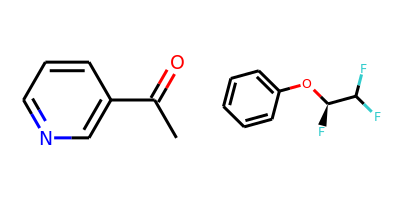

####################
mobley_3183805~mobley_9007496
SEM: 0.51 kcal/mol


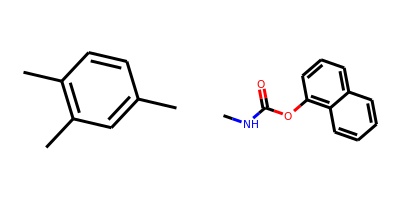

In [12]:
for index, row in all_transf_qu.iterrows():
    #print(index, row["sem"])
    ligA = index.split("~")[0]
    ligB = index.split("~")[1]
    reverse_pert = ligB+"~"+ligA
    
    ligA_mol = Chem.rdmolfiles.MolFromMolFile("/home/jscheen/projects/HYDRA_LEARN/FREESOLV/"+ligA+".pdb.sdf")
    ligB_mol = Chem.rdmolfiles.MolFromMolFile("/home/jscheen/projects/HYDRA_LEARN/FREESOLV/"+ligB+".pdb.sdf")
    
    try:
        #a few mols are a bit buggy, ignore for now.

        Chem.rdDepictor.Compute2DCoords(ligA_mol)
        Chem.rdDepictor.Compute2DCoords(ligB_mol)

        ligA_mol.UpdatePropertyCache()
        ligB_mol.UpdatePropertyCache()



        edge_length = 200
        molA_img = Draw.MolToImage(ligA_mol, size=(edge_length, edge_length), kekulize=True, wedgeBonds=True)
        molB_img = Draw.MolToImage(ligB_mol, size=(edge_length, edge_length), kekulize=True, wedgeBonds=True)

        print("####################")
        print(index)
        print("SEM:", round(row["sem"], 2), "kcal/mol")
        display(get_concat_h(molA_img, molB_img))
    except:
        pass
           

## Check for outliers in high SEM perturbations:


In [32]:
outlier_df = pd.concat([transf_0_ha, transf_1_ha, transf_2_ha, transf_3_ha, transf_4_ha, transf_5_ha], sort=False).drop("ha", axis=1).sort_values(by="sem", ascending=False)
outlier_df.head(30)

,rep1,rep2,rep3,rep4,rep5,sem,mean
mobley_6978427~mobley_3144334,-68.802796,1.547594,-27.828146,-118.439940,-177.603404,32.004372,-78.225338
mobley_1755375~mobley_2923700,-34.248415,-35.093954,-68.132401,-40.989267,-53.696267,6.443180,-46.432061
mobley_5571660~mobley_5072416,29.236987,17.303313,11.130357,26.865569,16.270177,3.407214,20.161281
mobley_3515580~mobley_8723116,-50.363242,-52.967056,-44.947434,-40.136328,-40.181556,2.612739,-45.719123
mobley_5518547~mobley_7497999,30.888976,30.424574,30.323168,37.748852,23.550507,2.247126,30.587215
mobley_8691603~mobley_5616693,-89.892067,-87.590959,-97.401704,-98.320766,-89.586303,2.205455,-92.558360
mobley_9942801~mobley_2763835,-5.677201,-11.957210,-0.339044,-2.617372,-0.430439,2.167690,-4.204253
mobley_3682850~mobley_755351,-19.951975,-7.919554,-8.740334,-12.209022,-13.645312,2.145270,-12.493239
mobley_5311804~mobley_4553008,4.254077,-4.965391,-5.493085,-4.899528,-4.076259,1.836572,-3.036037
mobley_7009711~mobley_2923700,33.919353,32.127363,32.390837,40.308453,36.317084,1.518900,35.012618


### Highlight the reversed FEPs;

In [61]:
reversed_feps = [["mobley_4715906~mobley_9478823", "mobley_9478823~mobley_4715906"],["mobley_1827204~mobley_3546460", "mobley_3546460~mobley_1827204"],["mobley_8492526~mobley_5759258", "mobley_5759258~mobley_8492526"],["mobley_6091882~mobley_2008055", "mobley_2008055~mobley_6091882"],["mobley_646007~mobley_2837389", "mobley_2837389~mobley_646007"],["mobley_8614858~mobley_49274", "mobley_49274~mobley_8614858"],["mobley_4043951~mobley_5449201", "mobley_5449201~mobley_4043951"]]
reversed_df = pd.DataFrame()
sums_perts = []

for pair in reversed_feps:
    sum_pert = outlier_df.loc[[pair[0]]]["mean"].values + outlier_df.loc[[pair[1]]]["mean"].values
    sums_perts.append(sum_pert.tolist()[0])
    sums_perts.append(sum_pert.tolist()[0])
    
    reversed_df = pd.concat([reversed_df, (pd.concat([outlier_df.loc[[pair[0]]], outlier_df.loc[[pair[1]]]]))])

reversed_df["sum(AB,BA)"] = sums_perts
reversed_df

,rep1,rep2,rep3,rep4,rep5,sem,mean,"sum(AB,BA)"
mobley_4715906~mobley_9478823,49.217457,53.828649,51.870219,51.986330,50.209908,0.795000,51.422513,-0.426386
mobley_9478823~mobley_4715906,-51.836083,-51.732806,-51.928771,-51.988584,-51.758251,0.048862,-51.848899,-0.426386
mobley_1827204~mobley_3546460,-6.221056,-6.002562,-6.009885,-5.545746,-5.890463,0.110792,-5.933942,-0.846747
mobley_3546460~mobley_1827204,5.125547,5.082797,5.085085,4.972826,5.169721,0.032700,5.087195,-0.846747
mobley_8492526~mobley_5759258,-5.935014,-5.829749,-6.008601,-5.745449,-5.925368,0.045750,-5.888836,-0.747738
mobley_5759258~mobley_8492526,5.086891,5.178869,5.023295,5.489462,4.926973,0.096294,5.141098,-0.747738
mobley_6091882~mobley_2008055,-20.803797,-20.914571,-20.736050,-20.629646,-20.899438,0.052955,-20.796700,1.056147
mobley_2008055~mobley_6091882,19.668912,22.465190,22.392292,23.243188,21.494656,0.612245,21.852848,1.056147
mobley_646007~mobley_2837389,25.645344,23.550657,23.955290,25.278058,25.842222,0.463088,24.854314,0.556302
mobley_2837389~mobley_646007,-24.417128,-24.262009,-24.316335,-24.302706,-24.191885,0.036814,-24.298013,0.556302
